# Real Estate Market Analysis

# Table of contents

1. General Information. Interim conclusions.


2. Data preprocessing.Interim conclusions. 
    * Column headings processing.
    * Artifacts processing.
    * Missing values processing.  
    * Changing the data type.
    * Duplicates processing.
    * Data categorization.


3. Dataframe editing (calculated fields).


4. Exploratory Data Analysis (EDA).
    * Real estate metrics analysis. Records filtration.   
    Interim conclusions.
    * Factors affecting the cost of housing. 
    Interim conclusions.
    * Localities with the highest number of ads.     
    Interim conclusions.
    * Real estate property analysis. Selecting apartments in the city centre (St.Petersburg).
    Conclusion.
    
    
5. General conclusion.

# General Information <a id='id1'></a>

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [2]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_columns", 100)

In [3]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

Displaying tables with borders:

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
# reading the file and saving it to the 'data' variable
try:
    data = pd.read_csv(r'C:\Users\maslo\Downloads\real_estate_data_eng.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: dataframe shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first five rows (DataFrame.head(5)) and also brief 
    analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head(5))
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# applying get_info function
get_info(data)

Total number of rows: 23699, total number of columns: 22.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_na

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Saint Peterburg,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,Shushary village,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Saint Peterburg,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Saint Peterburg,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Saint Peterburg,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
total_images,"23,699.00",NaN,NaN,NaN,9.86,5.68,0.00,5.00,8.00,9.00,11.00,15.00,50.00
last_price,"23,699.00",NaN,NaN,NaN,"6,541,548.77","10,887,013.27","12,190.00","3,190,000.00","4,104,250.40","4,650,000.00","5,295,000.00","7,585,000.00","763,000,000.00"
total_area,"23,699.00",NaN,NaN,NaN,60.35,35.65,12.00,37.60,46.00,52.00,58.00,75.00,900.00
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,"23,699.00",NaN,NaN,NaN,2.07,1.08,0.00,1.00,2.00,2.00,2.00,3.00,19.00
ceiling_height,"14,504.00",NaN,NaN,NaN,2.77,1.26,1.00,2.50,2.60,2.65,2.70,2.87,100.00
floors_total,"23,613.00",NaN,NaN,NaN,10.67,6.60,1.00,5.00,7.00,9.00,10.00,16.00,60.00
living_area,"21,796.00",NaN,NaN,NaN,34.46,22.03,2.00,18.00,27.50,30.00,33.40,45.00,409.70
floor,"23,699.00",NaN,NaN,NaN,5.89,4.89,1.00,2.00,4.00,4.00,5.00,9.00,33.00
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has 22 columns (14 of them - type float64, 3 - int64, 3 - object, 2 - bool type) and 23699 rows.

**According to the documentation:**

* `airports_nearest` - the distance to the nearest airport in meters (m.);
* `balcony` - the number of balconies;
* `ceiling_height` - the ceiling height in meters (m.);
* `cityCenters_nearest` - the distance to the Saint-Petersburg center in meters (m.);
* `days_exposition` - how many days the ad was displayed (from publication to removal);
* `first_day_exposition` - the publication date;
* `floor` - the apartment floor number;
* `floors_total` - the total number of floors in the building;
* `is_apartment` - legacy column which doesn't convey any important information (Boolean type). See the note below.
* `kitchen_area` - the kitchen area in square meters (sq.m.);
* `last_price` - the price at the time when the ad was removed;
* `living_area` - the living area in square meters (sq.m.);
* `locality_name` - the locality name;
* `open_plan` - an open plan design (Boolean type);
* `parks_around3000` - the number of parks in a 3 km. radius;
* `parks_nearest` - the distance to the nearest park in meters (m.);
* `ponds_around3000` - the number of bodies of water in a 3 km. radius;
* `ponds_nearest` - the distance to the nearest body of water (m.);
* `rooms` - the number of bedrooms;
* `studio` - whether it's a studio or not (Boolean type);
* `total_area` - the total area in square meters (sq.m.);
* `total_images` - the number of photos of the apartment in the ad;

*Note*: the column `is_apartment` has True values for properties that belong to the russian real estate entity confusingly called "apartments" - a space that is non-residential in a legal sense and is not considered a part of the housing stock, even though it is often used for temporary rental housing. This column has nothing to do with whether the property in question is an apartment or not - all records in this dataset are apartments.

**Brief data analysis:**
 - column names issues: `cityCenters_nearest` - multiple word variable not in 'snake case' style;
 - missing values in the `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` columns; 
 - data type issues: `first_day_exposition` - object (datetime type is needed), `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` - float64 (integer type is needed), `is_apartment` - object (bool type is needed);
 - data artifacts: `last_price` - min value is 12190 monetary units, `ceiling_heght` - min value is 1 m., max value - 100m., `total_area`, `kitchen_area` и `living_area` - suspicious min values (outliers check is needed).

## Interim conclusions <a id='id11'></a>   

Each row of the table contains data about an apartment. Some columns contain its parameters - total and living area, ceiling height, the number of balconies etc., the other describe the building itself and surrounding infrastructure - floor number, locality name, nearest airport, park distance. Also we have a brief information about the ad - publication date and how many days the ad was displayed (from publication to removal).

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove (or leave in some cases) duplicates, omit missing values, change the data type and column headings, find and delete outliers and data artifacts. 

# Data preprocessing <a id='id2'></a>

## Column headings processing <a id='id19'></a>

In [8]:
# rename the 'cityCenters_nearest' column
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

## Artifacts processing <a id='id20'></a>

In this section we'll analyze values distribution in `last_price`, `total_area`, `living_area` columns (check for data artifacts), check max and min values in `ceiling_height` column. 

In [9]:
# 5 smallest 'last_price' values
data.nsmallest(5, ['last_price'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.00",109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,False,False,40.50,NaN,Saint Peterburg,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00
14911,5,"430,000.00",54.00,2018-06-26T00:00:00,2,NaN,3.00,NaN,3,NaN,False,False,NaN,NaN,Svir' village,NaN,NaN,NaN,NaN,NaN,NaN,44.00
17456,7,"430,000.00",30.40,2019-04-22T00:00:00,1,NaN,2.00,16.00,1,NaN,False,False,6.00,NaN,Slantsy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16274,18,"440,000.00",40.00,2018-07-10T00:00:00,1,NaN,5.00,NaN,1,NaN,False,False,NaN,NaN,Staropol'ye village,NaN,NaN,NaN,NaN,NaN,NaN,45.00
5698,7,"450,000.00",42.00,2017-07-31T00:00:00,2,NaN,1.00,23.00,1,NaN,False,False,5.80,NaN,village Budogoshch,NaN,NaN,NaN,NaN,NaN,NaN,233.00


In [10]:
# 10 smallest 'total_area' values
data.nsmallest(10, ['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,"2,400,000.00",12.00,2017-07-19T00:00:00,1,2.55,5.00,10.00,2,NaN,False,False,NaN,NaN,Saint Peterburg,"21,314.00",964.00,1.00,886.00,2.00,45.00,200.00
17961,3,"1,400,000.00",13.00,2017-12-03T00:00:00,1,2.60,9.00,NaN,1,NaN,False,False,NaN,NaN,Saint Peterburg,"14,350.00","15,945.00",0.00,NaN,1.00,185.00,410.00
19546,3,"1,850,000.00",13.00,2019-03-11T00:00:00,1,3.40,5.00,NaN,2,False,False,False,NaN,NaN,Saint Peterburg,"24,915.00","5,483.00",1.00,644.00,0.00,NaN,24.00
19807,0,"3,800,000.00",13.00,2018-07-04T00:00:00,1,NaN,5.00,10.00,3,NaN,False,False,NaN,NaN,Saint Peterburg,"21,302.00","1,242.00",1.00,592.00,3.00,27.00,9.00
19558,2,"1,686,000.00",13.20,2018-12-17T00:00:00,1,NaN,5.00,NaN,1,NaN,False,False,NaN,NaN,Saint Peterburg,"19,891.00","4,165.00",1.00,361.00,1.00,155.00,19.00
19642,5,"1,190,000.00",14.00,2018-07-29T00:00:00,1,NaN,5.00,11.00,1,NaN,False,False,2.00,NaN,Saint Peterburg,"9,898.00","11,122.00",0.00,NaN,0.00,NaN,4.00
12040,5,"1,900,000.00",15.00,2018-06-27T00:00:00,1,2.50,5.00,NaN,1,NaN,False,False,NaN,NaN,Sosnovy Bor,NaN,NaN,NaN,NaN,NaN,NaN,45.00
16949,9,"1,550,000.00",15.00,2018-08-21T00:00:00,1,2.70,9.00,NaN,1,NaN,False,False,NaN,NaN,Saint Peterburg,"51,048.00","16,376.00",0.00,NaN,1.00,"1,079.00",42.00
8886,10,"2,450,000.00",15.50,2018-08-22T00:00:00,0,NaN,5.00,10.00,2,NaN,True,False,NaN,NaN,Saint Peterburg,"24,326.00","4,589.00",0.00,NaN,1.00,446.00,27.00
9412,5,"2,100,000.00",16.00,2017-12-10T00:00:00,0,NaN,6.00,13.00,1,NaN,False,True,NaN,NaN,Saint Peterburg,"20,735.00","2,111.00",2.00,228.00,3.00,72.00,3.00


In [11]:
# 10 smallest 'living_area' values
data.nsmallest(10, ['living_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,"6,350,000.00",52.00,2018-02-06T00:00:00,2,3.00,6.00,2.00,2,NaN,False,False,9.00,NaN,Saint Peterburg,"32,453.00","6,521.00",0.00,NaN,1.00,"1,012.00",91.00
21758,0,"2,330,000.00",23.00,2018-01-01T00:00:00,0,NaN,24.00,2.00,22,NaN,True,False,NaN,NaN,Murino village,NaN,NaN,NaN,NaN,NaN,NaN,66.00
3242,7,"4,440,000.00",41.00,2017-07-02T00:00:00,1,NaN,17.00,3.00,17,NaN,False,False,11.00,NaN,Saint Peterburg,"19,272.00","13,073.00",0.00,NaN,0.00,NaN,216.00
23574,14,"64,990,000.00",139.00,2015-11-24T00:00:00,3,3.00,8.00,3.00,8,NaN,False,False,16.00,1.00,Saint Peterburg,"33,255.00","5,975.00",1.00,630.00,3.00,100.00,280.00
17582,11,"2,680,000.00",22.00,2018-08-11T00:00:00,0,NaN,25.00,5.00,8,NaN,True,False,NaN,2.00,Saint Peterburg,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,70.00
21943,15,"6,100,000.00",77.60,2019-02-28T00:00:00,4,2.50,9.00,5.40,1,NaN,False,False,9.80,NaN,Saint Peterburg,"29,338.00","11,270.00",1.00,584.00,0.00,NaN,33.00
16431,13,"3,799,000.00",31.00,2018-04-12T00:00:00,1,2.60,5.00,6.00,1,NaN,False,False,17.00,NaN,Saint Peterburg,"32,177.00","4,826.00",1.00,430.00,0.00,NaN,168.00
19251,19,"4,050,000.00",33.00,2018-10-15T00:00:00,1,2.50,22.00,6.50,21,NaN,False,False,18.00,NaN,Saint Peterburg,"9,258.00","10,592.00",1.00,458.00,0.00,NaN,44.00
20994,7,"8,900,000.00",50.60,2018-10-22T00:00:00,2,2.50,7.00,8.00,3,NaN,False,False,31.00,NaN,Saint Peterburg,"12,771.00","8,301.00",1.00,173.00,3.00,126.00,NaN
23208,12,"4,800,000.00",37.00,2016-02-24T00:00:00,1,NaN,14.00,8.00,11,NaN,False,False,22.00,0.00,Saint Peterburg,"27,838.00","12,387.00",2.00,358.00,1.00,950.00,139.00


In [12]:
# 5 smallest 'ceiling_height' values
data.nsmallest(5, ['ceiling_height'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,"6,000,000.00",55.00,2018-10-31T00:00:00,2,1.00,12.00,32.40,7,NaN,False,False,10.00,NaN,Saint Peterburg,"33,053.00","14,217.00",2.00,293.00,2.00,289.00,13.00
5712,5,"1,500,000.00",42.80,2017-08-14T00:00:00,2,1.20,2.00,27.50,1,NaN,False,False,5.20,NaN,Mga village,NaN,NaN,NaN,NaN,NaN,NaN,248.00
16934,5,"4,100,000.00",40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,NaN,False,False,8.34,NaN,Saint Peterburg,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71.00
552,11,"2,999,000.00",33.50,2017-03-30T00:00:00,1,2.00,15.00,17.50,6,NaN,False,False,6.50,NaN,Saint Peterburg,"33,972.00","11,746.00",1.00,520.00,1.00,949.00,270.00
2572,4,"2,400,000.00",62.00,2018-12-27T00:00:00,3,2.00,5.00,40.00,4,NaN,False,False,6.00,1.00,Luga,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 5 largest 'ceiling_height' values
data.nlargest(5, ['ceiling_height'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,"15,000,000.00",25.00,2018-07-25T00:00:00,1,100.00,5.00,14.00,5,True,False,False,11.00,5.00,Saint Peterburg,"34,963.00","8,283.00",1.00,223.00,3.00,30.00,19.00
3148,14,"2,900,000.00",75.00,2018-11-12T00:00:00,3,32.00,3.00,53.00,2,NaN,False,False,8.00,NaN,Volkhov,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,"9,999,000.00",92.40,2019-04-05T00:00:00,2,32.00,6.00,55.50,5,False,False,False,16.50,4.00,Saint Peterburg,"18,838.00","3,506.00",0.00,NaN,3.00,511.00,NaN
21377,19,"4,900,000.00",42.00,2017-04-18T00:00:00,1,27.50,24.00,37.70,19,False,False,False,11.00,2.00,Saint Peterburg,"42,742.00","9,760.00",0.00,NaN,0.00,NaN,61.00
4876,7,"3,000,000.00",25.00,2017-09-27T00:00:00,0,27.00,25.00,17.00,17,NaN,False,True,NaN,2.00,Murino village,NaN,NaN,NaN,NaN,NaN,NaN,28.00


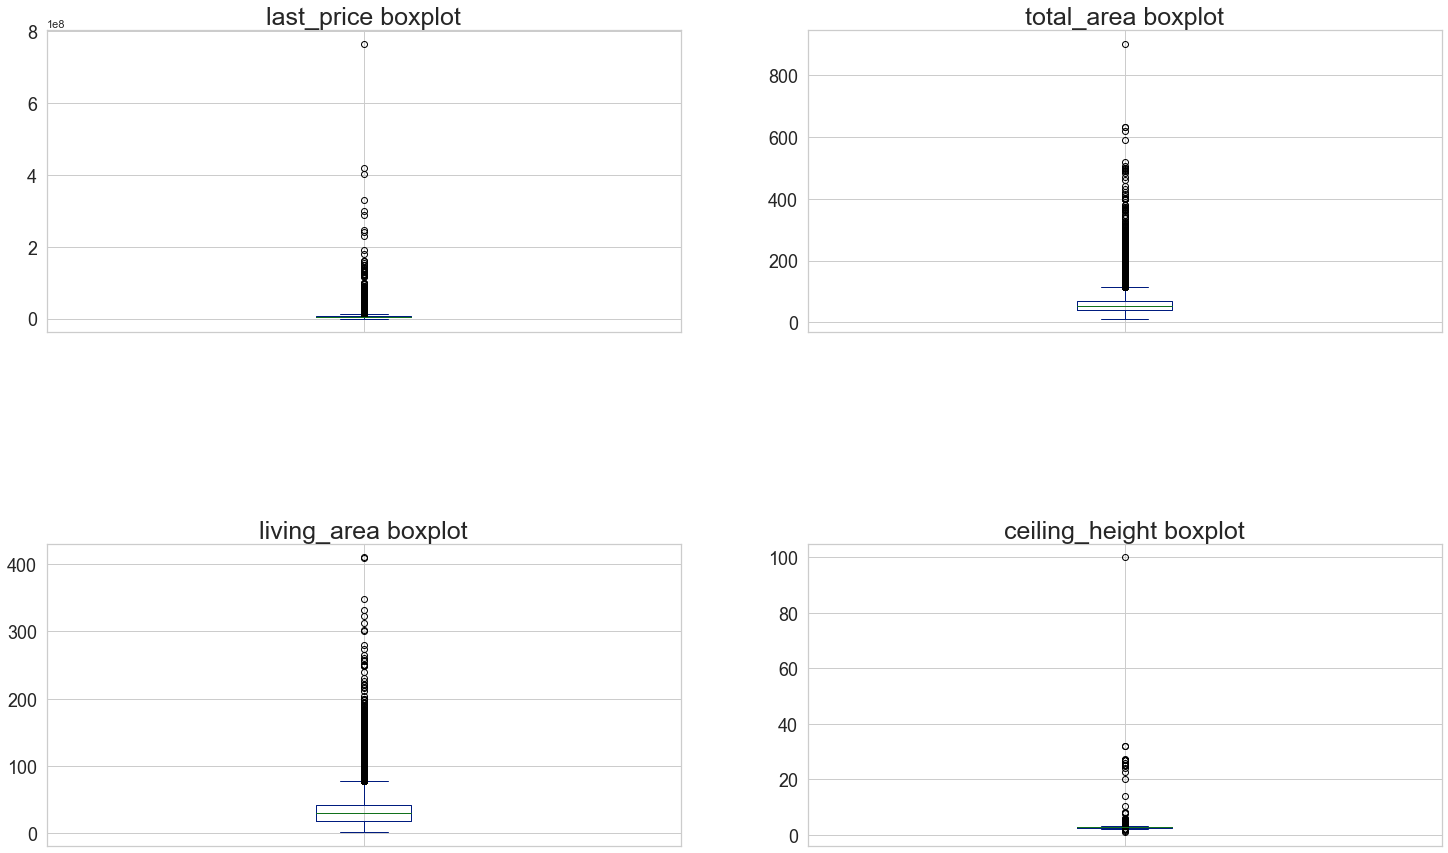

In [14]:
# boxplots
columns_required = ['last_price', 'total_area', 'living_area', 'ceiling_height']
fig = plt.figure(figsize=(25, 15))
ncols = 2
nrows = 2
for i, column in enumerate(columns_required):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.set_title(column + ' boxplot', fontsize=25)
    ax.tick_params(labelbottom=False, labelsize=18)
    data[column].plot(kind='box')
plt.subplots_adjust(hspace=0.7, wspace=0.2)

The record with the 12190 price value is most likely an error, we'll remove it. The rest low prices can be explained by the village localities and small values of the total area.    
Values of 12-18 sq.m. in the `total_area` column probably have communal and studio apartments (the living area in these records is lower than total).     
Values less than 10 sq.m. in the `living_area` column are most likely incorrect, we'll remove them.   
According to the plots there are quite a lot of records in all parameters that are beyond the interquartile range. We'll remove those values in the 'records filtration' section.

In [15]:
# drop string with incorrect price value
data.drop(index=[8793], inplace=True)

In [16]:
# drop string with living area value less than 10 sq.m.
data.drop(data[(data.living_area < 10)].index, inplace=True)

In [17]:
# check
data.nsmallest(5, ['living_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
248,7,"4,100,000.00",31.00,2015-08-02T00:00:00,1,3.00,17.00,10.00,6,False,False,False,NaN,0.00,Saint Peterburg,"39,771.00","8,672.00",1.00,139.00,0.00,NaN,637.00
615,15,"4,100,000.00",43.00,2017-06-30T00:00:00,1,NaN,18.00,10.00,12,NaN,False,False,20.00,2.00,Kudrovo village,NaN,NaN,NaN,NaN,NaN,NaN,18.00
1816,3,"1,650,000.00",22.00,2016-09-19T00:00:00,1,NaN,18.00,10.00,15,NaN,False,False,NaN,0.00,Nikolskoye,NaN,NaN,NaN,NaN,NaN,NaN,274.00
1947,11,"1,400,000.00",24.00,2018-06-15T00:00:00,1,2.55,5.00,10.00,5,NaN,False,False,6.00,NaN,Kommunar,NaN,NaN,NaN,NaN,NaN,NaN,3.00
2654,4,"3,936,700.00",42.80,2018-01-02T00:00:00,1,2.75,14.00,10.00,4,NaN,False,False,15.90,2.00,Sestroretsk,"59,377.00","36,307.00",1.00,88.00,2.00,140.00,16.00


**Ceiling_height column:** The minimum value of a ceiling height in a residential area is 2,4 m. We'll remove all values below this threshold. Also, we've found incorrect values - 100, 32, 27. Probably it was meant 2,7m. instead of 27 etc. These errors relate to the fact that this information is provided by the owner and they are entered manually. In outliers processing section we'll remove also values more than 4,5m. (maximum ceiling height in stalin-type buildings).  

In [18]:
# replace incorrect locality name
data['locality_name'].replace({'Saint Peterburg':'Saint Petersburg'}, inplace=True)

## Missing values processing <a id='id21'></a>

In [19]:
# missing values calculation
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

,missing_values,% of total
total_images,0,0.000000
last_price,0,0.000000
total_area,0,0.000000
first_day_exposition,0,0.000000
rooms,0,0.000000
ceiling_height,9187,38.810000
floors_total,86,0.360000
living_area,1903,8.040000
floor,0,0.000000
is_apartment,20898,88.280000


Previously we've figured out that missing values appear in the `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` columns.
We'll analyze and fill (or leave) them depending on the specific situation.

`ceiling_height` (38,8% of total): this data was entered manually by the seller, for some reasons it was not specified; we need this data for charts, but if we replace such a large amount of NaN records with mean\median value, we risk to get a misleading picture. Therefore, leave these records as they stand;     
`floors_total`, `locality_name` (less than 1% of total): a small number, we'll drop these records;      
`is_apartment` (88% of total): we'll fill in NaN value with 'False';     
`living_area`, `kitchen_area` (8% and 10%, respectively): living area is one of the main parameters of our research. The `total_area` column has no missing values. Since these two parameters are related, we'll fill NaN values based on the correlation between them (with linear regression method). The same goes for the `kitchen_area` column;      
`balcony` (50% of total) - large number of NaN values, leave them as they stand;      
`airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` (from 23% to 66% of total) - the data in these columns was filled automatically, based on a spatial data. The number of NaN values is large. The same number of missing values for some columns leads us to think that the calculations were failing for the same objects. Probably it's associated with inaccurate location defining (incorrect address) or with technical issues. Leave them unchanged.   
`city_centers_nearest` (23%) - since we have ads not only for St.Petersburg, but also for its surroundings, this NaN values could refer to these localities. We couldn't restore these values, therefore leave them as they stand;    
`days_exposition` (13% of total): the data was filled automatically. Probably the NaN values are associated with technical issues. Leave them unchanged. 

### Linear regression method

To fill in NaN in the `living_area` column we use linear regression method (scikit-learn library). We'll select a subset (`total_area` and `living area` columns) and split it on the test data (with NaN values in the living area) and the train data (without NaN values). Based on the train data, we'll fill missing values in the test data and in the original dataset. 

In [20]:
# subset for linear regression
lr_data = data[['total_area', 'living_area']]

In [21]:
# data with the NaN values in the 'living_area' column
test_data = lr_data[lr_data['living_area'].isnull()]

In [22]:
# data without NaN - train_data
lr_data.dropna(inplace=True)

In [23]:
# check NaN
lr_data.isna().sum()

total_area     0
living_area    0
dtype: int64

In [24]:
# living_area values from train_data that should be predicted
y_train = lr_data['living_area']
y_train

0       51.00
1       18.60
2       34.30
4       32.00
5       14.40
         ... 
23693   40.00
23694   73.30
23695   38.00
23696   29.70
23698   12.30
Name: living_area, Length: 21770, dtype: float64

In [25]:
# total_area values from train_data - predictor values
X_train = lr_data.drop('living_area', axis=1)
X_train

,total_area
0,108.00
1,40.40
2,56.00
4,100.00
5,30.40
...,...
23693,62.40
23694,133.81
23695,59.00
23696,56.70


In [26]:
# model training
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# drop NaN values living_area in the test_data
X_test = test_data.drop('living_area', axis=1)
X_test

,total_area
3,159.00
7,71.60
30,32.80
37,45.80
44,40.00
...,...
23642,80.30
23663,88.00
23670,45.60
23679,35.00


In [28]:
# predict living_area values based on the total_area values
y_pred = lr.predict(X_test)
y_pred

array([93.49010093, 41.3460535 , 18.19743748, ..., 25.83409431,
       19.50998787, 44.41861465])

In [29]:
# fill NaN in test_data with predicted values
test_data.loc[test_data.living_area.isnull(), 'living_area'] = y_pred
test_data

,total_area,living_area
3,159.00,93.49
7,71.60,41.35
30,32.80,18.20
37,45.80,25.95
44,40.00,22.49
...,...,...
23642,80.30,46.54
23663,88.00,51.13
23670,45.60,25.83
23679,35.00,19.51


In [30]:
# fill NaN in the original data 
data['living_area'].fillna(test_data['living_area'], inplace=True)

In [31]:
# check
data['living_area'].isna().sum()

0

In [32]:
# fill NaN in the 'kitchen_area' column with the same approach
lr_data_k = data[['total_area', 'kitchen_area']]
lr_data_k

,total_area,kitchen_area
0,108.00,25.00
1,40.40,11.00
2,56.00,8.30
3,159.00,NaN
4,100.00,41.00
...,...,...
23694,133.81,13.83
23695,59.00,8.50
23696,56.70,NaN
23697,76.75,23.30


In [33]:
test_data_k = lr_data_k[lr_data_k['kitchen_area'].isnull()]
test_data_k

,total_area,kitchen_area
3,159.00,NaN
30,32.80,NaN
37,45.80,NaN
44,40.00,NaN
59,46.50,NaN
...,...,...
23655,40.50,NaN
23663,88.00,NaN
23670,45.60,NaN
23679,35.00,NaN


In [34]:
lr_data_k.dropna(inplace=True)
lr_data_k.isna().sum()

total_area      0
kitchen_area    0
dtype: int64

In [35]:
y_train_k = lr_data_k['kitchen_area']
X_train_k = lr_data_k.drop('kitchen_area', axis=1)
display(y_train_k)
X_train_k

0       25.00
1       11.00
2        8.30
4       41.00
5        9.10
         ... 
23693    8.00
23694   13.83
23695    8.50
23697   23.30
23698    9.00
Name: kitchen_area, Length: 21398, dtype: float64

,total_area
0,108.00
1,40.40
2,56.00
4,100.00
5,30.40
...,...
23693,62.40
23694,133.81
23695,59.00
23697,76.75


In [36]:
lr.fit(X_train_k, y_train_k)

LinearRegression()

In [37]:
X_test_k = test_data_k.drop('kitchen_area', axis=1)
y_pred_k = lr.predict(X_test_k)
display(X_test_k)
y_pred_k

,total_area
3,159.00
30,32.80
37,45.80
44,40.00
59,46.50
...,...
23655,40.50
23663,88.00
23670,45.60
23679,35.00


array([20.6578705 ,  7.68638415,  9.02259115, ...,  9.00203411,
        7.91251149, 10.14294932])

In [38]:
test_data_k.loc[test_data_k.kitchen_area.isnull(), 'kitchen_area'] = y_pred_k
test_data_k

,total_area,kitchen_area
3,159.00,20.66
30,32.80,7.69
37,45.80,9.02
44,40.00,8.43
59,46.50,9.09
...,...,...
23655,40.50,8.48
23663,88.00,13.36
23670,45.60,9.00
23679,35.00,7.91


In [39]:
data['kitchen_area'].fillna(test_data_k['kitchen_area'], inplace=True)

In [40]:
# check
data['kitchen_area'].isna().sum()

0

In [41]:
# drop NaN in the 'locality_name', 'floors_total' columns
data.dropna(subset = ['locality_name', 'floors_total'], inplace=True)

In [42]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23539 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23539 non-null  int64  
 1   last_price            23539 non-null  float64
 2   total_area            23539 non-null  float64
 3   first_day_exposition  23539 non-null  object 
 4   rooms                 23539 non-null  int64  
 5   ceiling_height        14463 non-null  float64
 6   floors_total          23539 non-null  float64
 7   living_area           23539 non-null  float64
 8   floor                 23539 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23539 non-null  bool   
 11  open_plan             23539 non-null  bool   
 12  kitchen_area          23539 non-null  float64
 13  balcony               12078 non-null  float64
 14  locality_name         23539 non-null  object 
 15  airports_nearest   

In [43]:
# total number of NaN in the 'city_centers_nearest' columns
len(data.query('city_centers_nearest != city_centers_nearest'))

5500

In [44]:
# NaN in the 'city_centers_nearest' coulmn where locality is not St.Petersburg
len(data.query('city_centers_nearest != city_centers_nearest and locality_name != "Санкт-Петербург"'))

5500

As expected these NaN values doesn't include St.Petersburg records. 

## Changing the data type. <a id='id22'></a>

In this section we'll make following data type changes: 

* `first_day_exposition` - object to datetime (to_datetime method);
* `floors_total`, `days_exposition`, `balcony` - float64 to int64 (astype method);
* `is_apartment` - object to bool (filling NaN using fillna method);

In [45]:
# float64 to int64
data[['floors_total', 'days_exposition', 'balcony']] = data[['floors_total', 'days_exposition', 'balcony']].apply(lambda x: x.astype('int64', copy=False, errors='ignore'))

In [46]:
# filling NaN values with 'False'
data['is_apartment'] = data['is_apartment'].fillna(False)

In [47]:
# object to datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [48]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23539 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23539 non-null  int64         
 1   last_price            23539 non-null  float64       
 2   total_area            23539 non-null  float64       
 3   first_day_exposition  23539 non-null  datetime64[ns]
 4   rooms                 23539 non-null  int64         
 5   ceiling_height        14463 non-null  float64       
 6   floors_total          23539 non-null  int64         
 7   living_area           23539 non-null  float64       
 8   floor                 23539 non-null  int64         
 9   is_apartment          23539 non-null  bool          
 10  studio                23539 non-null  bool          
 11  open_plan             23539 non-null  bool          
 12  kitchen_area          23539 non-null  float64       
 13  balcony         

## Duplicates processing <a id='id23'></a>

Before duplicates check transform to lower register locality names (`str.lower()` method).

In [49]:
# lower register transformation
data['locality_name'] = data['locality_name'].str.lower()

In [50]:
# duplicates check
data.duplicated().sum()

0

There are no duplicates in the data.

## Data categorization <a id='id24'></a>

In this section we'll categorize the `floor` column - with a custom function we'll add a new column with following values: first, top, other. 

In [51]:
# categorization function
def floor_group(row):
    """
    The function takes a dataframe row as an input. A dataframe row is a 'Series' object, therefore we can refer to
    its cells in the function body. Th function returns one of three above mentioned  floor categories.
    """
    if row['floor'] == row['floors_total']:
        if row['floor'] == 1:
            return 'first'
        return 'top'
    else:
        return 'other'

In [52]:
# test data
test_func_data = {'floor':[1, 15, 25, 10, 1],
        'floors_total':[1, 21, 25, 10, 1]}
test_df = pd.DataFrame(test_func_data)
test_df

,floor,floors_total
0,1,1
1,15,21
2,25,25
3,10,10
4,1,1


In [53]:
# function testing
test_df['floor_group'] = test_df.apply(floor_group, axis=1)
test_df

,floor,floors_total,floor_group
0,1,1,first
1,15,21,other
2,25,25,top
3,10,10,top
4,1,1,first


In [54]:
# applying to the original data and check
data['floor_group'] = data.apply(floor_group, axis=1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,NaN,saint petersburg,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,other
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2.00,shushary village,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,other
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0.00,saint petersburg,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,other
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,93.49,9,False,False,False,20.66,0.00,saint petersburg,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,other
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,NaN,saint petersburg,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,other


# Dataframe editing (calculated fields). <a id='id3'></a>

In this section we'll add next information to our dataset:
* the price per square meter (divide the`last_price` value by the `total_area` value for each row);
* the day of the week, month, and year the ad was published (`dt.day_name()`/month/year method);
* the living and the total area ratio, the kitchen and the total area ratio (divide appropriate values for each row);

In [55]:
# price per square meter column
data['square_meter_price'] = data['last_price'] / data['total_area']

In [56]:
# day of the week, month, and year columns
data['weekday'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [57]:
# area ratio columns
data['living_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']

In [58]:
# проверка
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,square_meter_price,weekday,month,year,living_total_ratio,kitchen_total_ratio
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,NaN,saint petersburg,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,other,"120,370.37",Thursday,3,2019,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2.00,shushary village,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,other,"82,920.79",Tuesday,12,2018,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0.00,saint petersburg,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,other,"92,785.71",Thursday,8,2015,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,93.49,9,False,False,False,20.66,0.00,saint petersburg,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,other,"408,176.10",Friday,7,2015,0.59,0.13
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,NaN,saint petersburg,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,other,"100,000.00",Tuesday,6,2018,0.32,0.41


# Exploratory Data Analysis (EDA) <a id='id4'></a>

In this section we'll:
* discover next metrics: area, price, price per sq.m., number of rooms, ceiling height;
* plot histograms and boxplots for each parameter;
* determine which factors have the biggest influence on a price;
* remove outliers.

##  Real estate metrics analysis. Records filtration. <a id='id41'></a>

### Total area, living area

In [59]:
# general information about the area
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,"23,539.00","23,539.00","23,539.00"
mean,60.34,34.64,10.51
std,35.66,22.48,5.75
min,12.00,6.38,1.30
25%,40.00,19.00,7.10
50%,52.00,30.00,9.10
75%,69.70,42.20,11.90
max,900.00,409.70,112.00


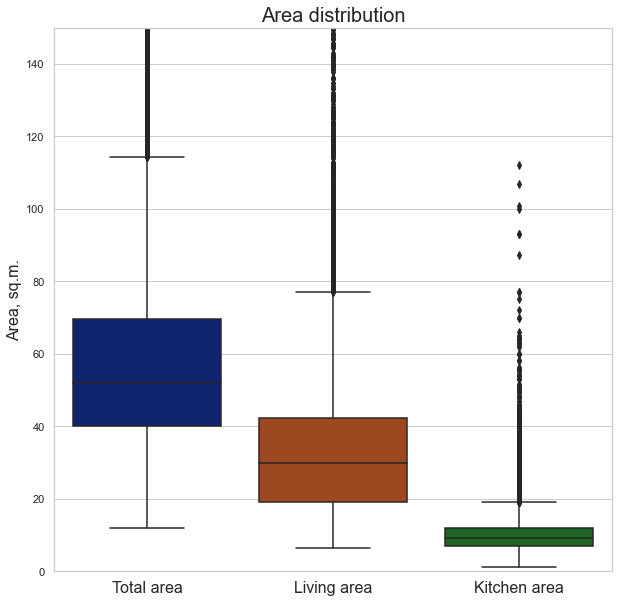

In [60]:
# area boxplots
sns.boxplot(data=data[['total_area', 'living_area', 'kitchen_area']])
plt.title('Area distribution', fontsize=20)
plt.ylim(0, 150)
plt.xticks([0, 1, 2], ['Total area', 'Living area', 'Kitchen area'], fontsize=16)
plt.ylabel('Area, sq.m.', fontsize=16);

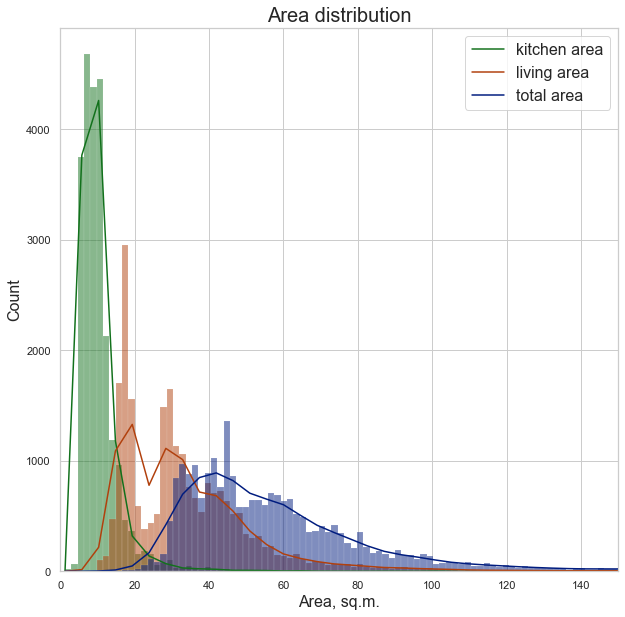

In [61]:
# area histograms
sns.histplot(data[['total_area', 'living_area', 'kitchen_area']], kde=True)
plt.xlim(0, 150)
plt.title('Area distribution', fontsize=20)
plt.xlabel('Area, sq.m.', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper right', labels=['kitchen area', 'living area', 'total area'], fontsize=16);

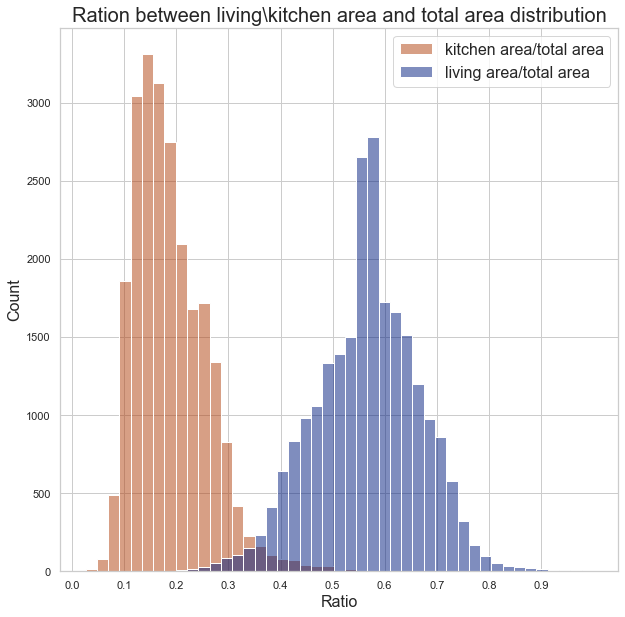

In [62]:
# ratio historgrams
sns.histplot(data[['living_total_ratio', 'kitchen_total_ratio']])
plt.title('Ration between living\kitchen area and total area distribution', fontsize=20)
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('Ratio', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper right', labels=['kitchen area/total area', 'living area/total area'], fontsize=16);

### Ceiling height

In [63]:
# general information
data[['ceiling_height']].describe()

,ceiling_height
count,"14,463.00"
mean,2.77
std,1.26
min,1.00
25%,2.51
50%,2.65
75%,2.80
max,100.00


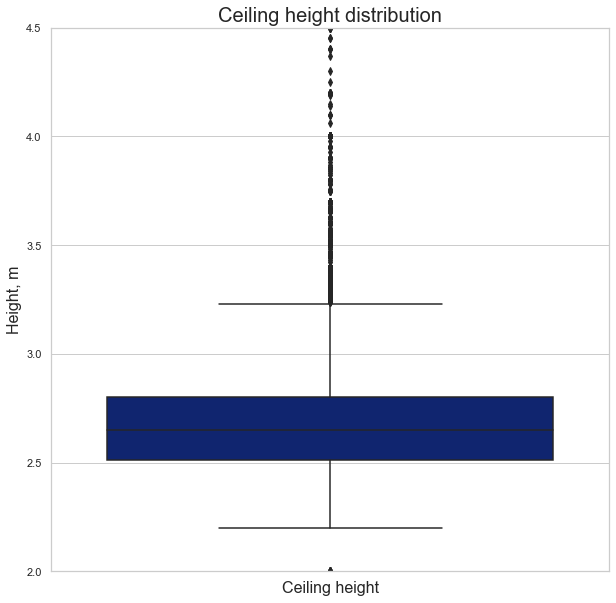

In [64]:
# сeiling height boxplot
sns.boxplot(data=data['ceiling_height'])
plt.title('Ceiling height distribution', fontsize=20)
plt.ylabel('Height, m', fontsize=16)
plt.ylim(2.0, 4.5)
plt.xticks([0], ['Ceiling height'], fontsize=16);

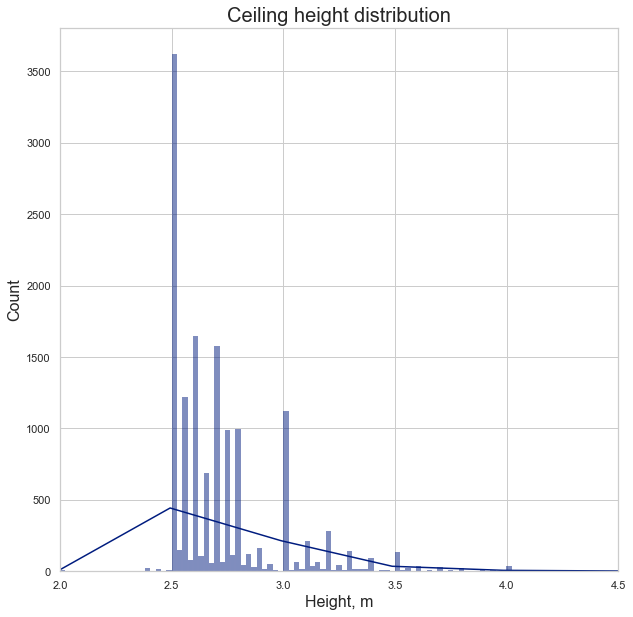

In [65]:
# сeiling height histogram
sns.histplot(data['ceiling_height'], kde=True)
plt.title('Ceiling height distribution', fontsize=20)
plt.xlabel('Height, m', fontsize=16)
plt.xlim(2.0, 4.5)
plt.ylabel('Count', fontsize=16);

### Number of rooms

In [66]:
# general information 
data[['rooms']].describe()

,rooms
count,"23,539.00"
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


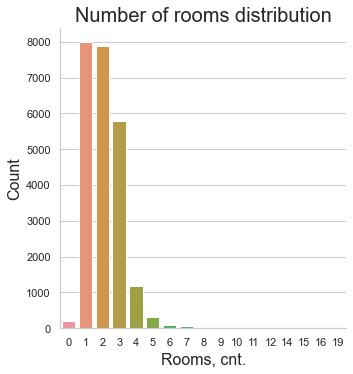

In [67]:
# rooms plot
sns.catplot(x='rooms', kind='count', data=data)
plt.title('Number of rooms distribution', fontsize=20)
plt.xlabel('Rooms, cnt.', fontsize=16)
plt.ylabel('Count', fontsize=16);

### Price

In [68]:
# general information
data[['last_price']].describe()

,last_price
count,"23,539.00"
mean,"6,539,669.97"
std,"10,909,960.46"
min,"430,000.00"
25%,"3,400,000.00"
50%,"4,650,000.00"
75%,"6,794,500.00"
max,"763,000,000.00"


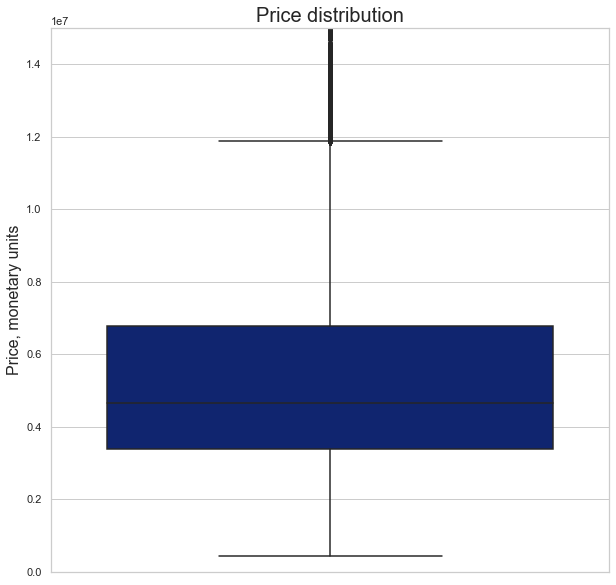

In [69]:
# price boxplot
sns.boxplot(data=data['last_price'])
plt.title('Price distribution', fontsize=20)
plt.ylim(0, 15000000)
plt.ylabel('Price, monetary units', fontsize=16)
plt.xticks([0], []);

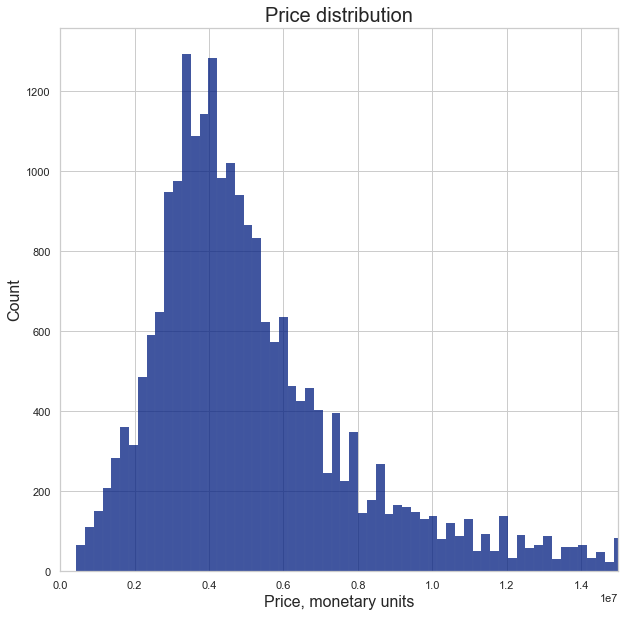

In [70]:
# price histogram
sns.histplot(data['last_price'])
plt.xlim(0, 15000000)
plt.title('Price distribution', fontsize=20)
plt.xlabel('Price, monetary units', fontsize=16)
plt.ylabel('Count', fontsize=16);

### Price per square meter

In [71]:
# general information
data[['square_meter_price']].describe()

,square_meter_price
count,"23,539.00"
mean,"99,365.37"
std,"50,337.63"
min,"7,962.96"
25%,"76,561.25"
50%,"95,000.00"
75%,"114,160.57"
max,"1,907,500.00"


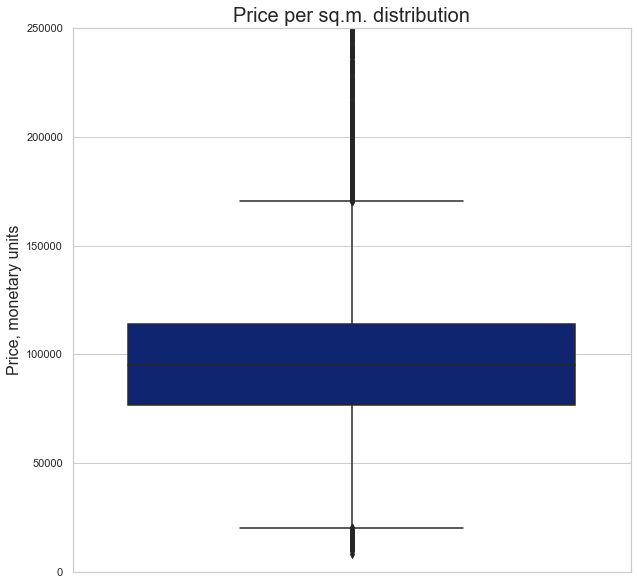

In [72]:
# price boxplot
sns.boxplot(data=data['square_meter_price'])
plt.title('Price per sq.m. distribution', fontsize=20)
plt.ylim(0, 250000)
plt.ylabel('Price, monetary units', fontsize=16)
plt.xticks([0], []);

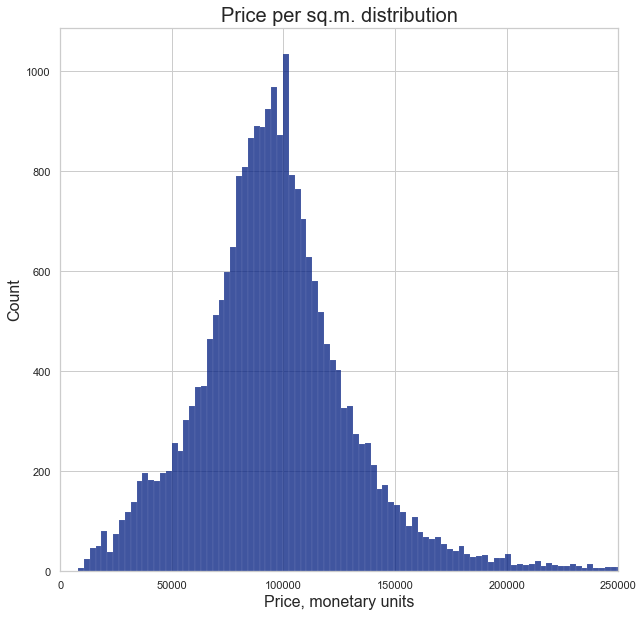

In [73]:
# price histogram
sns.histplot(data['square_meter_price'])
plt.xlim(0, 250000)
plt.title('Price per sq.m. distribution', fontsize=20)
plt.xlabel('Price, monetary units', fontsize=16)
plt.ylabel('Count', fontsize=16);

### Days exposition

In [74]:
# general information
data[['days_exposition']].describe()

,days_exposition
count,"20,371.00"
mean,180.78
std,219.82
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,"1,580.00"


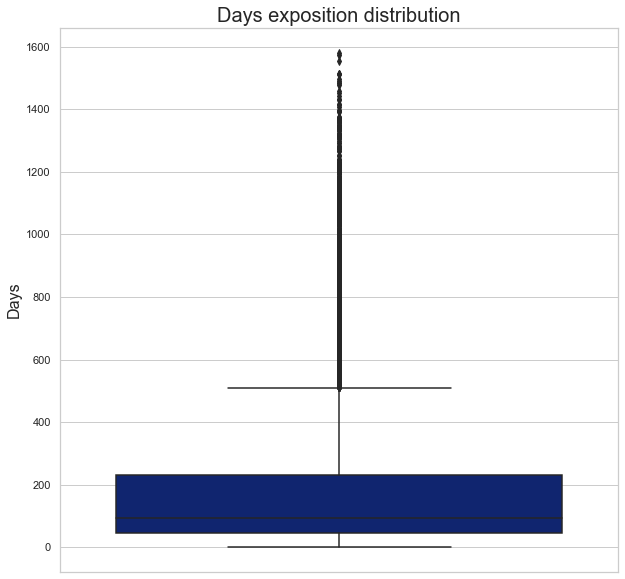

In [75]:
# days exposition boxplot
sns.boxplot(data=data['days_exposition'])
plt.title('Days exposition distribution', fontsize=20)
plt.xticks([0], [])
plt.ylabel('Days', fontsize=16);

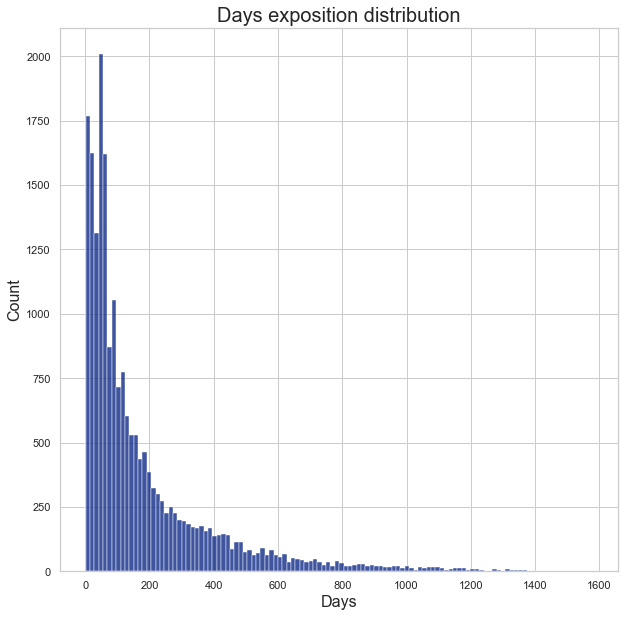

In [76]:
# days exposition histogram
sns.histplot(data['days_exposition'])
plt.title('Days exposition distribution', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16);

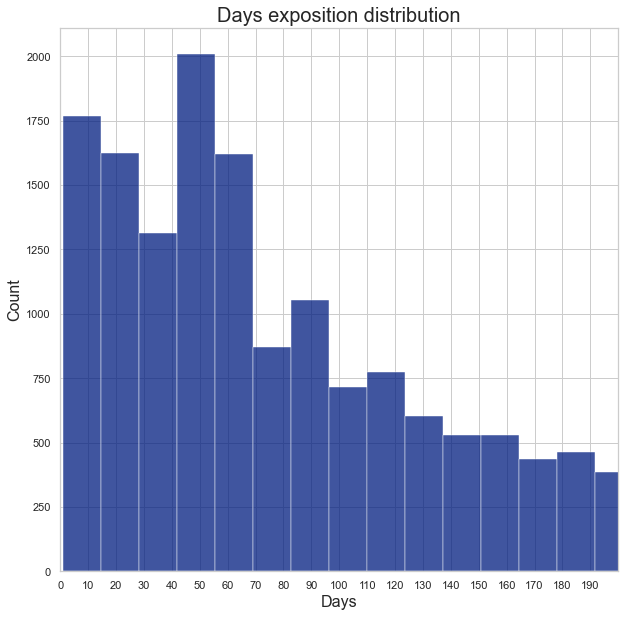

In [77]:
sns.histplot(data['days_exposition'])
plt.xticks(np.arange(0, 200, step=10))
plt.xlim(0, 200)
plt.title('Days exposition distribution', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16);

In [78]:
# days exposition min\max values
print('Min exposition date: ', data['first_day_exposition'].min())
print('Max exposition date: ', data['first_day_exposition'].max())

Min exposition date:  2014-11-27 00:00:00
Max exposition date:  2019-05-03 00:00:00


In [79]:
# number of ads by year
data['year'].value_counts().to_frame()

,year
2018,8474
2017,8153
2019,2868
2016,2744
2015,1164
2014,136


## Interim conclusions <a id='id411'></a>

The plots and information obtained by describe() method leads to the following conclusions:

*Area.* Interquartile range is 40-72 sq.m., the median is about 55 sq.m. Such an area most often corresponds to one-, two- and three-bedroom apartments based on the layout: one bedroom apartment - an open plan\studio, two bedroom apartment - the most typical area, three bedroom apartment - small-sized, typical for the 60-70s buildings.  
Living area\total area ratio - 0.58, living area interquartile range is 20-40 sq.m., the median is about 30 sq.m. - there is a strong correlation between values of total and living area. There are two peaks on the living area histogram approximately in 18 and 30 sq.m. and a dip between 20-25 sq.m. The kitchen and total area histograms are smoother.    
The kitchen makes up approximately 15% of the total area.    
There is a large number of "outliers" in the data, we'll filter them out.      

*Price.* The average is strongly influenced by high prices (the mean is biased up to 6.5M compared to the median of 4.5M) - prices above 12M. We'll filter them out. According to the histogram, the price parameter is distributed normally.    

*Price per sq.m.* is normally distributed. 

*Ceiling height.* There are about 40% of NaN values. So we’ll estimate the remaining 60%. The median and the mean are approximately equal (about 2.6-2.7 m.), the standard deviation is small (i.e. there are a small proportion of high ceilings). It can be assumed, the data contain a large proportion of second homes - histogram peak in 2.5m. (old buildings). The height of ceilings in modern buildings is about 2.7m.     

*Number of rooms.* As expected from the area data, the bulk consists of one-, two- and three-bedroom apartments. Apartments with 7 rooms and higher can be filtered.      

*Days exposition.* According to the histogram there are a large share of small values - when scaling up, withdrawing the ad up to 40 days (especially less than 10 days). Maybe we should check these ads for fraudulent transactions. Average exposition date (180 days) is twice the median (95 days), also we see a large standard deviation. These values are affected by the "long-running sales" - more than 400 days. The average sale takes about 3 months, long-running sale - more than 350 days, too fast -  less than a month (particular less than 10 days). Let’s analyze long-running and fast-running sales.

In [80]:
# fast-running sales variable
too_fast = data.query('days_exposition < 40')

In [81]:
#  fast-running sales analysis
percentiles= [.20, .40, .60, .80]
include=['object', 'float', 'int'] 
too_fast.describe(percentiles = percentiles, include = include)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,square_meter_price,weekday,month,year,living_total_ratio,kitchen_total_ratio
count,"4,540.00","4,540.00","4,540.00","4,540.00","2,671.00","4,540.00","4,540.00","4,540.00","4,540.00","2,520.00",4540,"3,683.00","3,689.00","3,689.00","1,528.00","3,689.00","1,738.00","4,540.00",4540,"4,540.00",4540,"4,540.00","4,540.00","4,540.00","4,540.00"
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,saint petersburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN,Tuesday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956,NaN,843,NaN,NaN,NaN,NaN
mean,9.63,"5,696,788.90",53.92,1.87,2.78,11.28,30.73,6.20,9.79,1.15,NaN,"28,695.05","14,425.84",0.56,478.96,0.70,540.92,19.29,NaN,"99,808.76",NaN,6.85,"2,017.76",0.56,0.19
std,5.85,"12,614,098.78",30.48,0.99,2.20,6.49,19.85,4.83,5.11,1.02,NaN,"13,011.56","8,071.97",0.76,314.80,0.89,275.68,10.65,NaN,"46,465.67",NaN,3.53,0.74,0.10,0.07
min,0.00,"530,000.00",13.00,0.00,1.00,1.00,6.38,1.00,2.00,0.00,NaN,"6,450.00",318.00,0.00,10.00,0.00,16.00,1.00,NaN,"12,724.55",NaN,1.00,"2,016.00",0.14,0.04
20%,4.00,"3,200,000.00",35.00,1.00,2.50,5.00,17.60,2.00,6.50,0.00,NaN,"15,533.00","9,218.80",0.00,245.00,0.00,265.00,8.00,NaN,"76,470.59",NaN,3.00,"2,017.00",0.48,0.13
40%,8.00,"3,990,000.00",43.00,1.00,2.60,9.00,22.05,4.00,8.00,1.00,NaN,"23,006.80","12,348.20",0.00,392.00,0.00,459.80,15.00,NaN,"90,593.14",NaN,6.00,"2,018.00",0.54,0.17
50%,9.00,"4,400,000.00",46.26,2.00,2.60,9.00,28.00,5.00,8.86,1.00,NaN,"27,084.00","13,355.00",0.00,451.00,0.00,544.00,19.00,NaN,"96,428.57",NaN,8.00,"2,018.00",0.56,0.19


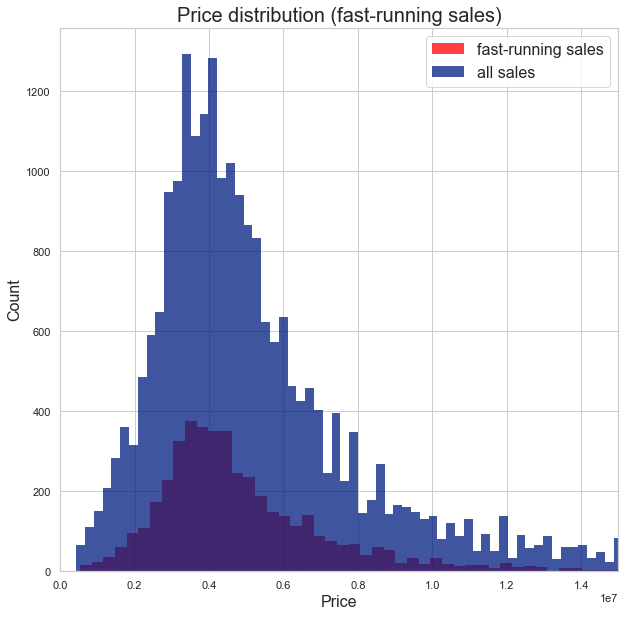

In [82]:
# fast-running sales price histogram
sns.histplot(too_fast['last_price'], color='red')
sns.histplot(data['last_price'])
plt.xlim(0, 15000000)
plt.title('Price distribution (fast-running sales)', fontsize=20)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper right', labels=['fast-running sales', 'all sales'], fontsize=16);

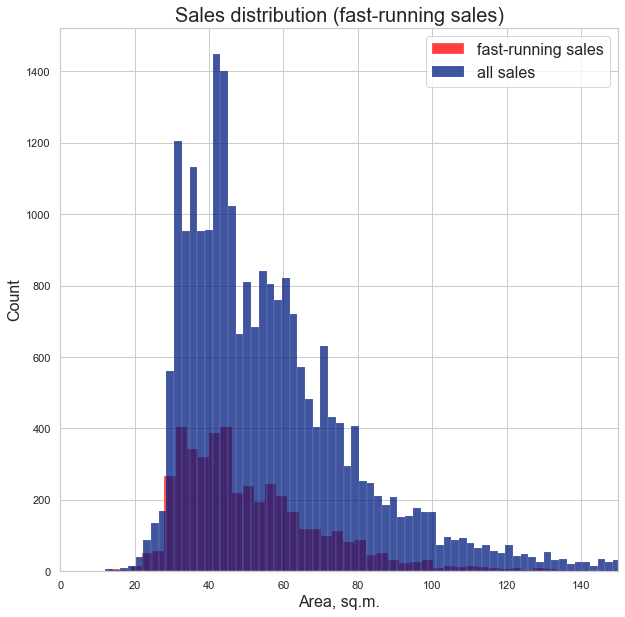

In [83]:
# fast-running sales area histogram
sns.histplot(too_fast['total_area'], color='red')
sns.histplot(data['total_area'])
plt.xlim(0, 150)
plt.title('Sales distribution (fast-running sales)', fontsize=20)
plt.xlabel('Area, sq.m.', fontsize=16)
plt.legend(loc='upper right', labels=['fast-running sales', 'all sales'], fontsize=16)
plt.ylabel('Count', fontsize=16);

In [84]:
# fast-running sales ratio by year
year_too_fast = too_fast['year'].value_counts()
year_data = data['year'].value_counts()
year_fast_data = pd.concat([year_too_fast, year_data], axis=1, keys=['too_fast', 'original_data'])
year_fast_data['too_fast_ratio'] = year_fast_data['too_fast'] / year_fast_data['original_data']
year_fast_data

,too_fast,original_data,too_fast_ratio
2014,NaN,136,NaN
2015,NaN,1164,NaN
2016,107.00,2744,0.04
2017,"1,599.00",8153,0.20
2018,"2,104.00",8474,0.25
2019,730.00,2868,0.25


In [85]:
# fast-running sales distribution (2017-2019) in months 
(too_fast
 .query('year in [2017, 2018, 2019]')
 .groupby('year')['month']
 .value_counts()
 .to_frame())

month
year month       
2017 11       346
     9        215
     10       198
     8        169
     12       150
     6        122
     7        103
     4         97
     5         97
     2         60
     1         41
     3          1
2018 11       320
     10       307
     2        246
     8        242
     9        231
     3        230
     7        191
     1        111
     12       103
     6         83
     4         40
2019 3        297
     4        166
     2        142
     1        124
     5          1

*Fast-running sales analysis.* The parameters distribution (area, price, floor) doesn't differ from the original data distribution. The main location of fast-running sales is St. Petersburg. Fast-running sales were absent in 2014 and 2015. Their share increased sharply in 2017 compared to 2016 (from 4% to 20%), and in 2018-2019 they make up 25% of total sales. Perhaps this can be explained by the increase in demand for real property when indicated.   

In [86]:
# long-running sales variable
too_slow = data.query('days_exposition > 350')

In [87]:
# general information
percentiles= [.20, .40, .60, .80]
include=['object', 'float', 'int'] 
too_slow.describe(percentiles = percentiles, include = include)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,square_meter_price,weekday,month,year,living_total_ratio,kitchen_total_ratio
count,"3,229.00","3,229.00","3,229.00","3,229.00","2,058.00","3,229.00","3,229.00","3,229.00","3,229.00","1,729.00",3229,"2,519.00","2,522.00","2,522.00","1,214.00","2,522.00","1,370.00","3,229.00",3229,"3,229.00",3229,"3,229.00","3,229.00","3,229.00","3,229.00"
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,saint petersburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2742,NaN,623,NaN,NaN,NaN,NaN
mean,9.20,"7,936,757.53",68.29,2.26,2.81,10.15,39.42,5.58,11.49,1.01,NaN,"28,311.39","13,234.86",0.70,493.10,0.89,479.27,600.07,NaN,"102,263.67",NaN,6.51,"2,016.08",0.57,0.18
std,5.51,"13,293,882.10",43.30,1.20,0.84,6.43,27.33,4.76,6.86,1.06,NaN,"11,977.63","9,301.79",0.86,368.55,1.01,278.75,238.23,NaN,"56,449.28",NaN,3.50,0.96,0.10,0.07
min,0.00,"490,000.00",13.00,0.00,2.40,1.00,6.38,1.00,4.00,0.00,NaN,"6,949.00",318.00,0.00,7.00,0.00,16.00,350.00,NaN,"12,542.37",NaN,1.00,"2,014.00",0.17,0.03
20%,4.00,"3,300,000.00",40.00,1.00,2.50,5.00,18.30,2.00,7.00,0.00,NaN,"18,032.60","5,224.80",0.00,229.80,0.00,210.00,403.60,NaN,"70,384.08",NaN,3.00,"2,015.00",0.48,0.12
40%,7.00,"4,390,000.00",50.00,2.00,2.60,6.00,29.24,3.00,9.00,1.00,NaN,"23,604.00","10,655.20",0.00,389.00,0.00,384.60,473.00,NaN,"86,956.52",NaN,5.00,"2,016.00",0.55,0.15
50%,9.00,"5,015,195.00",57.00,2.00,2.70,9.00,32.20,4.00,10.00,1.00,NaN,"25,599.00","12,036.00",0.00,447.00,1.00,448.00,520.00,NaN,"94,222.22",NaN,6.00,"2,016.00",0.57,0.17


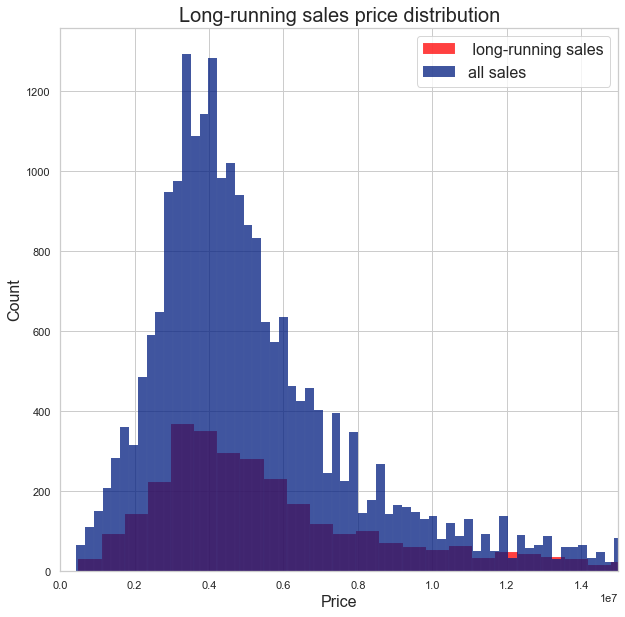

In [88]:
# long-running sales price histogram
sns.histplot(too_slow['last_price'], color='red')
sns.histplot(data['last_price'])
plt.xlim(0, 15000000)
plt.title('Long-running sales price distribution', fontsize=20)
plt.legend(loc='upper right', labels=[' long-running sales', 'all sales'], fontsize=16)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Count', fontsize=16);

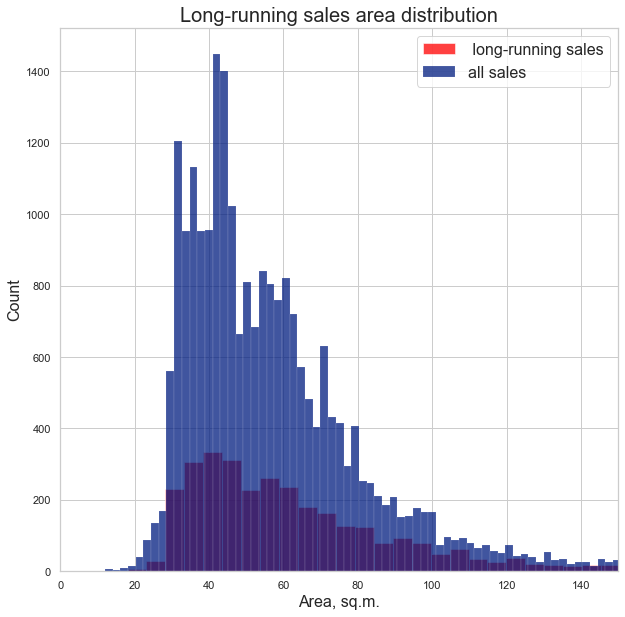

In [89]:
# long-running sales area histogram
sns.histplot(too_slow['total_area'], color='red')
sns.histplot(data['total_area'])
plt.xlim(0, 150)
plt.title('Long-running sales area distribution', fontsize=20)
plt.legend(loc='upper right', labels=[' long-running sales', 'all sales'], fontsize=16)
plt.xlabel('Area, sq.m.', fontsize=16)
plt.ylabel('Count', fontsize=16);

In [90]:
# long-running sales ratio by year
year_too_slow = too_slow['year'].value_counts()
year_slow_data = pd.concat([year_too_slow, year_data], axis=1, keys=['too_slow', 'original_data'])
year_slow_data['too_slow_ratio'] = year_slow_data['too_slow'] / year_fast_data['original_data']
year_slow_data

,too_slow,original_data,too_slow_ratio
2014,118.00,136,0.87
2015,874.00,1164,0.75
2016,"1,015.00",2744,0.37
2017,"1,080.00",8153,0.13
2018,142.00,8474,0.02
2019,NaN,2868,NaN


In [91]:
# long-running sales distribution (2014-2016) in months
(too_slow
 .query('year in [2014, 2015, 2016]')
 .groupby('year')['month']
 .value_counts()
 .to_frame())

month
year month       
2014 12       101
     11        17
2015 3        103
     11        95
     6         87
     7         85
     10        82
     12        72
     8         66
     9         63
     5         61
     2         58
     1         55
     4         47
2016 3        111
     4        110
     5        107
     6        102
     2         89
     11        89
     9         86
     10        79
     12        74
     7         73
     8         52
     1         43

*Long-running sales analysis.* Long sales make up the main part of ads 2014-2015, in 2019 they're absent. This may be due to low demand, possibly lower customer activity on the platform in 2014-2015. There is no specific change in the monthly share of these ads. It is possible that since 2018, these ads have been deleted automatically due to a lack of use. The main property location is Saint Petersburg. According to the describe() table, we see the average and median price increasing (the median 5M against 4.6M.; average - 7.8M against 6.5M in the original data). The same can be said about the total area values. On the histogram, these differences are almost invisible.

### Records filtration

In this section we'll filter the original data based on the following conditions:
- total area up to 120 sq.m. incl.;
- price up to 12M. incl.;
- number of rooms up to 7 incl.;
- ceiling height range 2.4 - 4.5 m. incl.;    

There are missing values in the `ceiling_height`, so this column will be processed separately. We'll select the non-null values in a separate variable, filter them according to the condition and reconnect them to the original data.

In [92]:
# values filtration
filtered_data = data.query('total_area <= 120 and last_price <= 12000000 and rooms < 7')

In [93]:
# non-null 'ceiling_height' values
filtered_data_isna = filtered_data.query('ceiling_height.isnull()', engine='python')

In [94]:
# 'ceiling_height' column filtering
filtered_data = filtered_data.query('2.4 <= ceiling_height <= 4.5', engine='python')

In [95]:
# values reconnecting
filtered_data = filtered_data.merge(filtered_data_isna, how='outer')

## Factors affecting the cost of housing <a id='id42'></a>

In this section we'll analyze how different features affect the last price:
* area;
* number of rooms;
* distance from the center;
* floor (first, top, other);
* announcement date (day of the week,  month, year);

### Price dynamics in 2014-2019 (by year and month)

In [96]:
# matplotlib customization
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

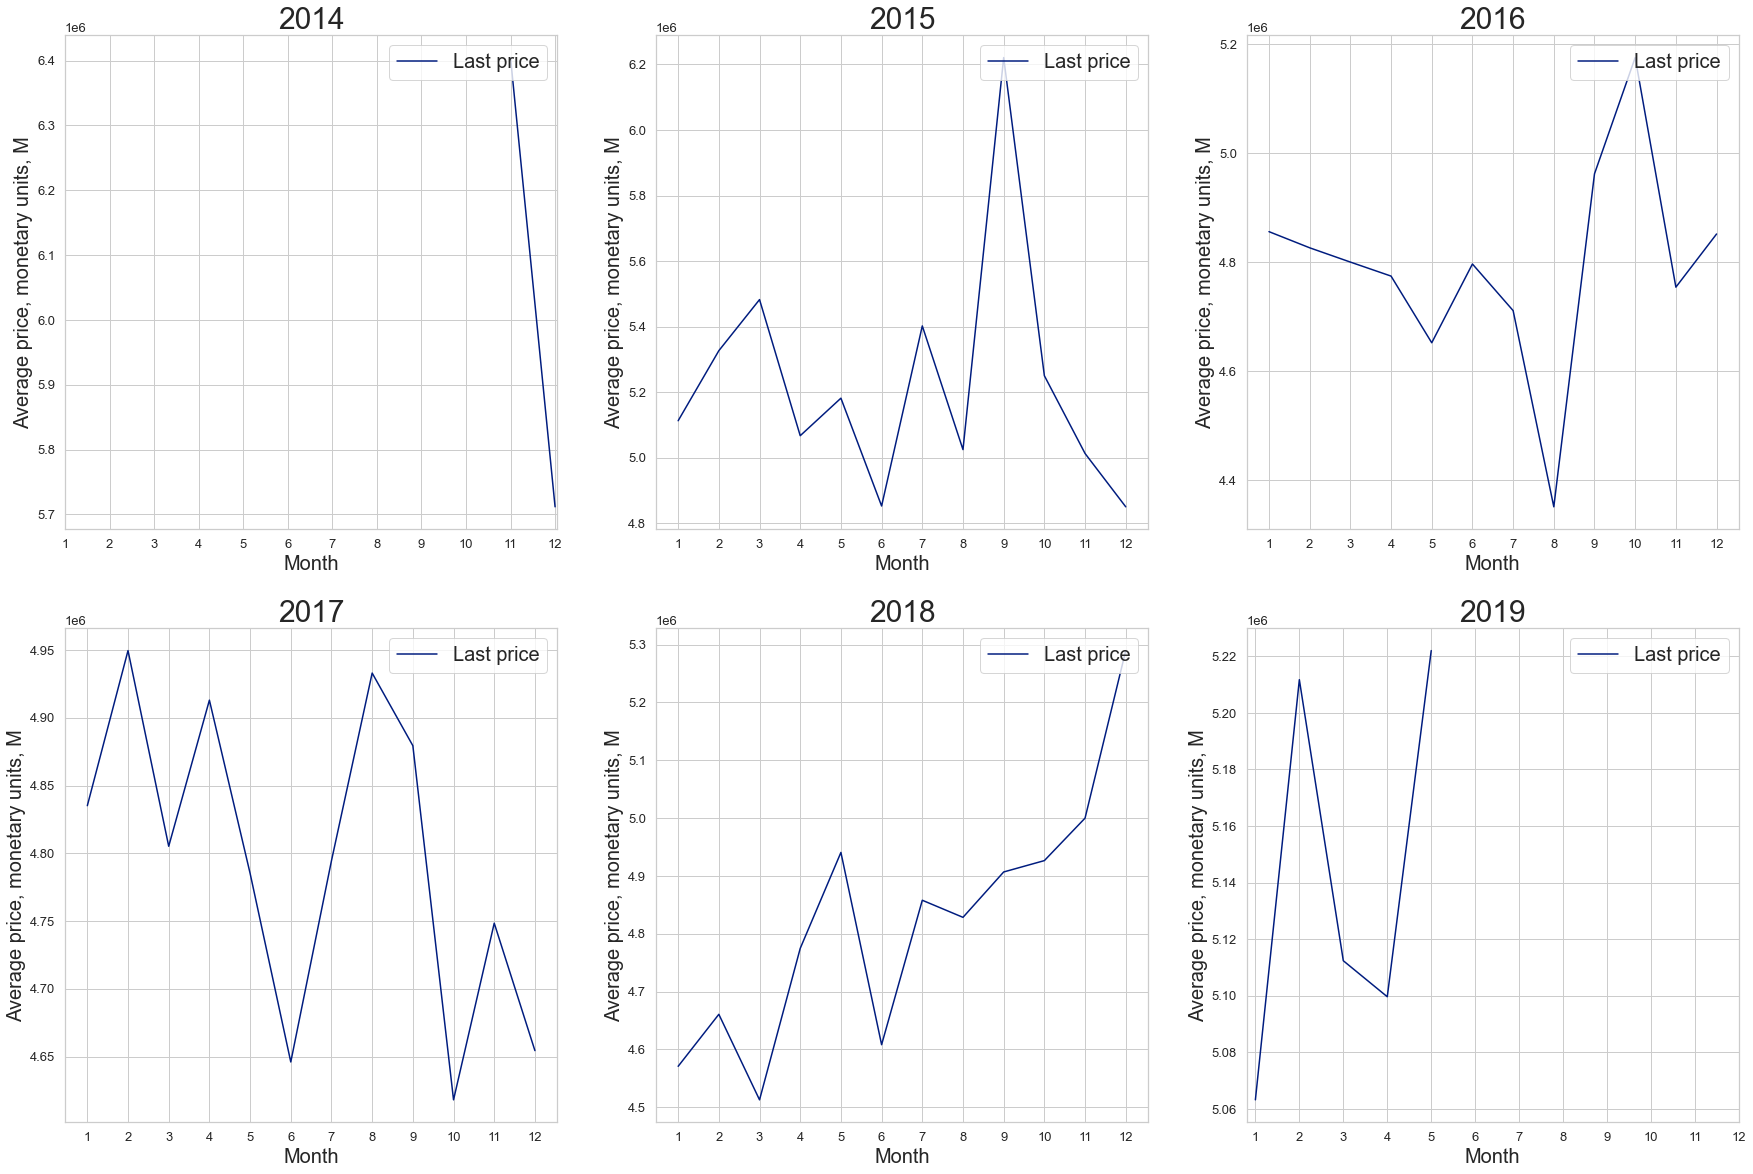

In [97]:
# price dynamics for each year
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
years = [2014, 2015, 2016, 2017, 2018, 2019]
for year, ax in zip(years, axs.ravel()):
    filtered_data[filtered_data['year'] == year].pivot_table(index='month', values='last_price').plot(ax=ax)
    ax.set_title(year, fontsize=30)
    ax.legend(loc='upper right', labels=['Last price'], fontsize=20)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Average price, monetary units, M', fontsize=20)
    ax.set_xticks(np.arange(1,13,1));

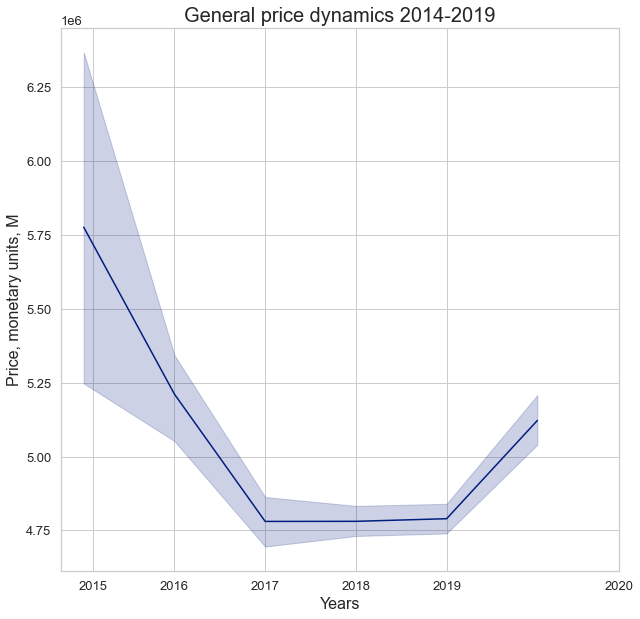

In [98]:
# general price dynamics 2014-2019
sns.lineplot(data=filtered_data, x='year', y='last_price')
plt.title('General price dynamics 2014-2019', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16)
plt.xticks([2014.1,2015,2016,2017,2018,2019.9],[2015,2016,2017,2018,2019,2020]);

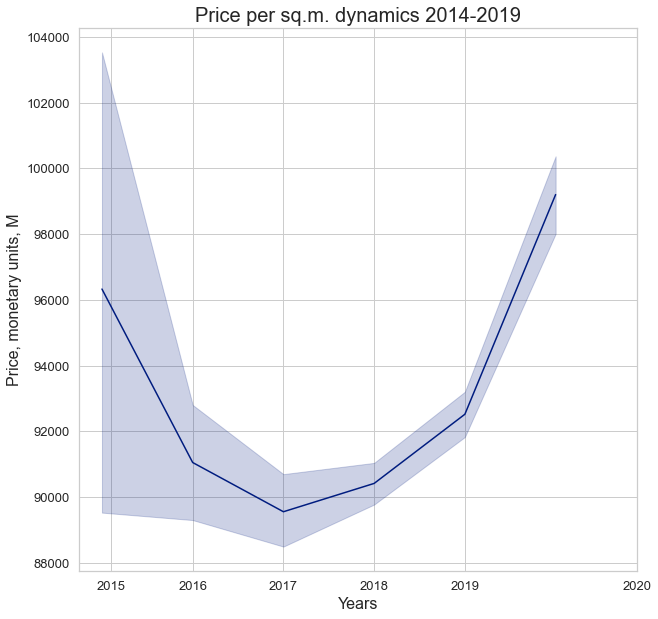

In [99]:
# price per sq.m. dynamics
sns.lineplot(data=filtered_data, x='year', y='square_meter_price')
plt.title('Price per sq.m. dynamics 2014-2019', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16)
plt.xticks([2014.1,2015,2016,2017,2018,2019.9],[2015,2016,2017,2018,2019,2020]);

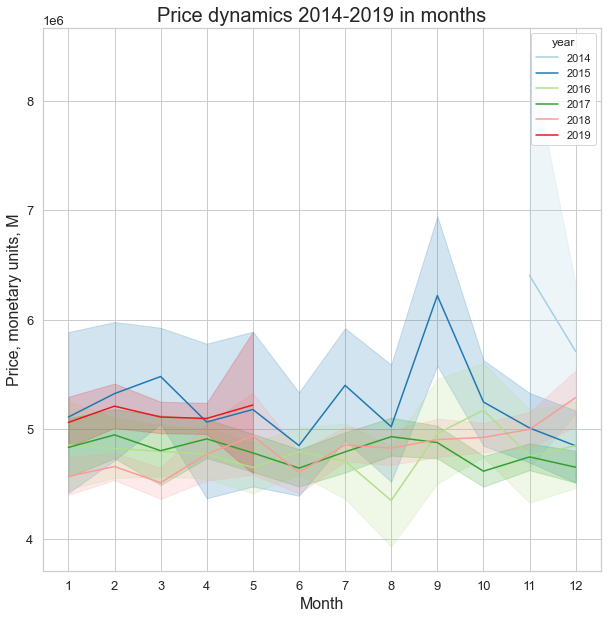

In [100]:
# price dynamics 2014-2019 in months
sns.lineplot(data=filtered_data, x='month', y='last_price', hue='year', palette='Paired')
plt.title('Price dynamics 2014-2019 in months', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16)
plt.xticks(np.arange(1,13,1), np.arange(1,13,1));

### How price per sq.m., the day of the week, floor, number of rooms and area influence on an apartment’s value?

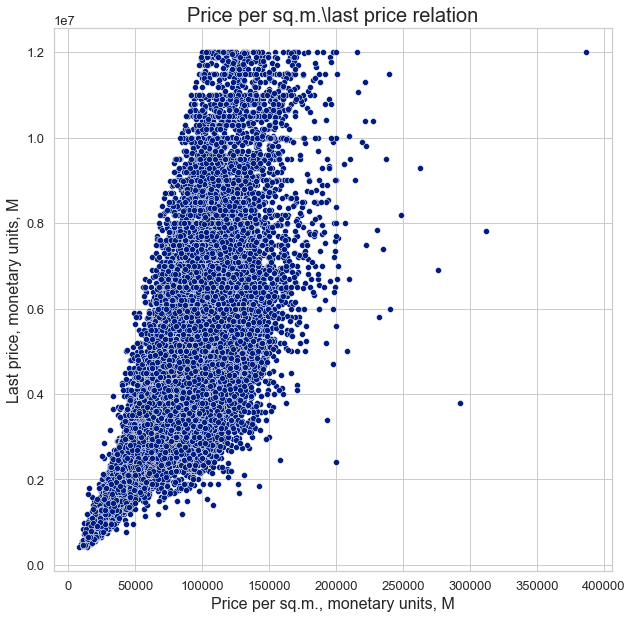

In [101]:
# square_meter_price\last price relation
sns.scatterplot(data=filtered_data, x='square_meter_price', y='last_price')
plt.title('Price per sq.m.\last price relation', fontsize=20)
plt.xlabel('Price per sq.m., monetary units, M', fontsize=16)
plt.ylabel('Last price, monetary units, M', fontsize=16);

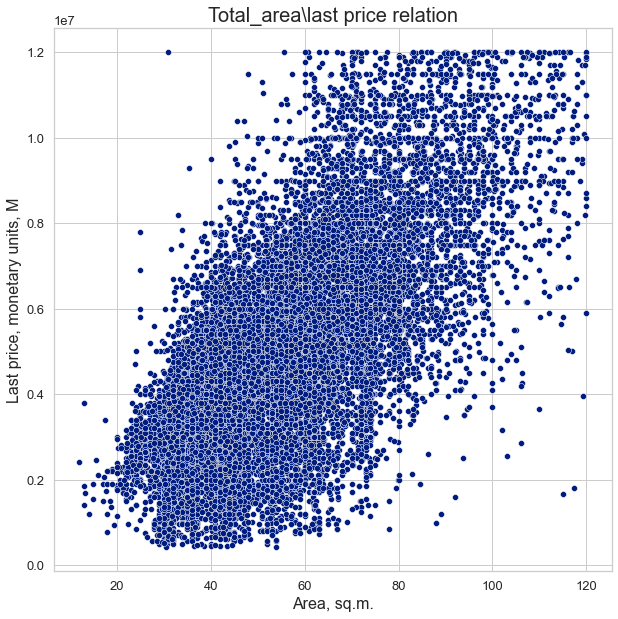

In [102]:
# total_area\last price relation
sns.scatterplot(data=filtered_data, x='total_area', y='last_price')
plt.title('Total_area\last price relation', fontsize=20)
plt.xlabel('Area, sq.m.', fontsize=16)
plt.ylabel('Last price, monetary units, M', fontsize=16);

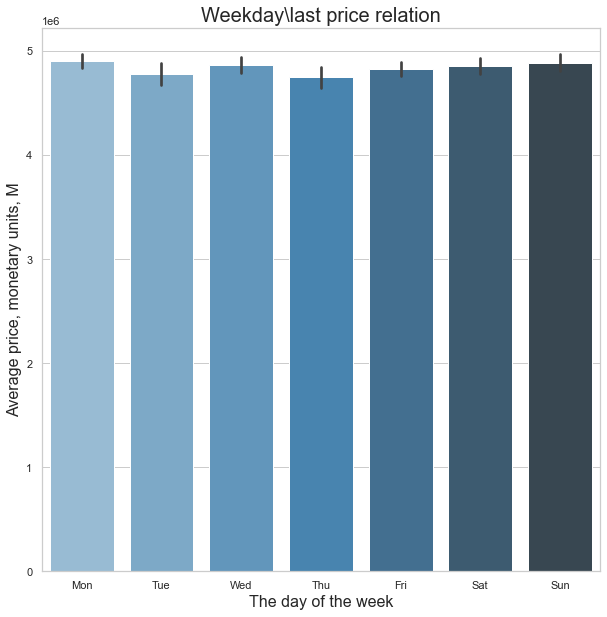

In [103]:
# weekday\last price relation
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='weekday', y='last_price', data=filtered_data, palette='Blues_d')
plt.title('Weekday\last price relation', fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('The day of the week', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

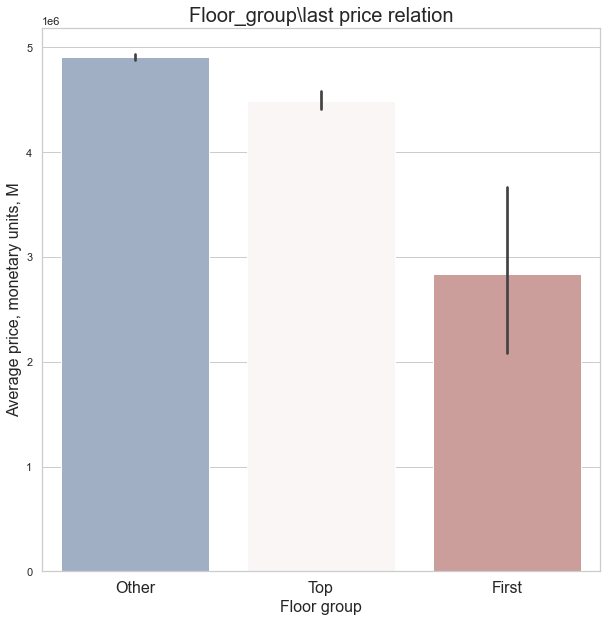

In [104]:
# floor_group\last price relation
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='floor_group', y='last_price', data=filtered_data, palette='vlag')
plt.title('Floor_group\last price relation', fontsize=20)
plt.xticks([0, 1, 2], ['Other', 'Top', 'First'], fontsize=16)
plt.xlabel('Floor group', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

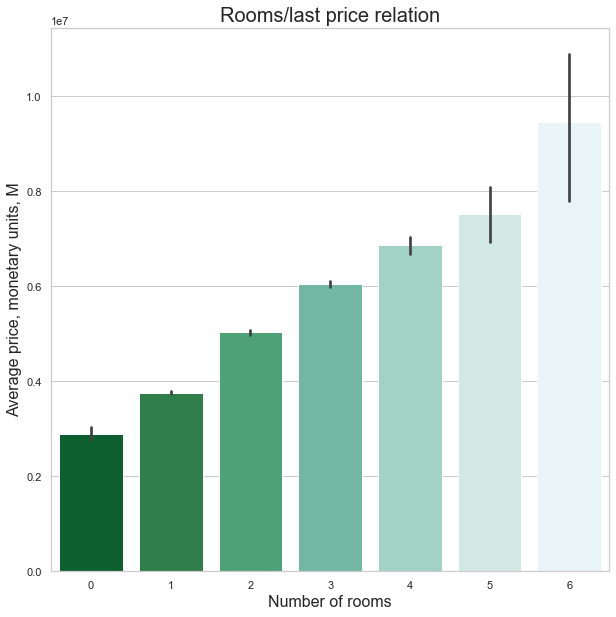

In [105]:
# rooms/last price relation
sns.set_theme(style='whitegrid')
sns.barplot(x='rooms', y='last_price', data=filtered_data, palette='BuGn_r')
plt.title('Rooms/last price relation', fontsize=20)
plt.xlabel('Number of rooms', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

In [106]:
# new variable for correlation matrix
data_for_matrix = filtered_data[['total_area', 'last_price', 'city_centers_nearest', 'square_meter_price']]

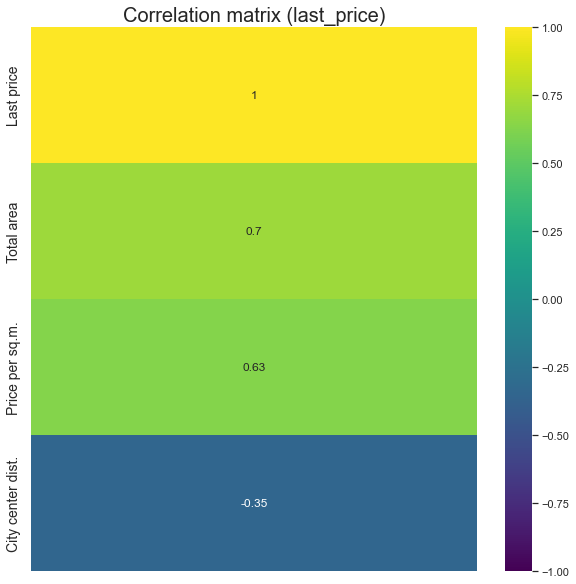

In [107]:
# correlation matrix (last_price)
heatmap = sns.heatmap(data_for_matrix.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation matrix (last_price)', fontsize=20);
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Last price', 'Total area', 'Price per sq.m.', 'City center dist.'], fontsize=14)
plt.xticks([0], []);

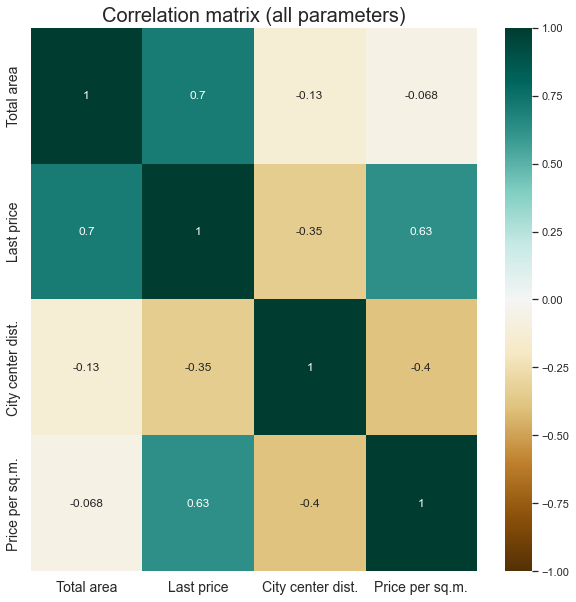

In [108]:
# correlation matrix (all parameters)
heatmap = sns.heatmap(data_for_matrix.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Total area', 'Last price', 'City center dist.', 'Price per sq.m.'], fontsize=14)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Total area', 'Last price', 'City center dist.', 'Price per sq.m.'], fontsize=14)
heatmap.set_title('Correlation matrix (all parameters)', fontsize=20);

## Interim conclusions <a id='id412'></a>

*Price dynamics.* The time period of our data is November 2014 - May 2019.   
According to the price dynamics charts: the maximum average price for the entire period was at the end of 2014 (6.4M), then it decreases to 4.4M by August 2016 and stabilize at 4.8M. In the second half of 2016 and 2017 we see slight fluctuations at the level of 4.7-5.3M. From the 2018 mid-year to the first half of 2019 the price is going up to 5.2M. The growth trend continues. General dynamics shows us a dip in prices (2014) and a smooth growth in 2018. The monthly charts, placed on the same grid, reveal greater price fluctuations in 2015 and smooth changes in the other years. All of these changes are probably related to economic developments in general and real estate in particular.     

*Price per sq.m.*  2014-2019 dynamics repeats the trend of the last price. There is a positive correlation with the last price (0.63) and a weak negative with the city center distance (-0.4).       

*Day of the week.* Minor price changes, it does not depend on the weekday.    

*Floor.* There is a relation between floor group and price, especially for the ground floor apartments (the fall in the average price is about 1.8 times). It was expected - the demand for first\top floor housing is usually lower.     

*Rooms.* We observe a positive correlation.    

*Area.* Strong positive correlation (0.7).    

On the final chart (correlation with the last_price parameter) first place with the coefficient of 0.7 takes the area parameter, then the price per sq.m.(0.63), a weak negative correlation is observed with the city center distance (the relationship between these values in the Saint Petersburg will be analyzed further).    

## Localities with the highest number of ads. <a id='id43'></a>

In [109]:
# get localities with the highest number of ads and average price per sq.m. calculation
ten_loc = filtered_data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
ten_loc.columns = ['count', 'sq_m_mean']
ten_loc.sort_values(by='count', ascending=False).head(10)

,count,sq_m_mean
locality_name,,
saint petersburg,13646,"105,819.66"
murino village,549,"85,575.05"
shushary village,437,"78,565.54"
vsevolozhsk,393,"67,284.29"
pushkin,338,"100,397.23"
kolpino,335,"75,221.88"
pargolovo village,326,"90,332.26"
gatchina,302,"68,675.45"
kudrovo village,298,"92,409.73"


In [110]:
# 10 localities with the highest price per sq.m.
ten_loc.sort_values(by='sq_m_mean', ascending=False).head(20)

,count,sq_m_mean
locality_name,,
saint petersburg,13646,"105,819.66"
zelenogorsk,21,"102,890.47"
lisiy nos village,3,"100,660.81"
sestroretsk,166,"100,600.07"
pushkin,338,"100,397.23"
kudrovo,169,"99,809.88"
mistolovo village,11,"98,549.98"
levashovo village,1,"96,997.69"
murino,34,"92,722.71"


In [111]:
# 10 localities with the lowest price per sq.m.
ten_loc.sort_values(by='sq_m_mean').head(20)

,count,sq_m_mean
locality_name,,
staropol'ye village,3,"11,206.22"
svir' village,2,"11,481.48"
village vakhnova kara,1,"11,688.31"
vyskatka village,2,"12,335.48"
sovkhozny village,2,"12,629.13"
malaya romanovka village,1,"12,724.55"
tyosovo village,1,"12,931.03"
bor village,1,"13,157.89"
sizhno village,1,"13,709.68"


## Interim conclusions <a id='id413'></a>

The largest number of ads have St.Petersburg and the surrounding areas. In the same locations we see the highest prices per sq.m., along with the villages in the north-west of Petersburg (Lisi Nos, Zelenogorsk, Sestroretsk, Repino - located along the coast of the Gulf of Finland). The settlements with the lowest price per sq.m. (Vyborg, Vsevolodzsk, Gatchina) are remote from St.Petersburg. Also, they have a small number (1-2) of ads.

## Real estate property analysis. Selecting apartments in the city centre (St.Petersburg). <a id='id44'></a>

In this section we'll select all apartments that are located in St.Petersburg. Then we'll analyze the price dynamics depending on the proximity to the downtown (allocate the downtown zone). Finally, we'll analyze the factors affecting the cost of housing in this zone: price, area, number of rooms, ceiling height etc. 

In [112]:
# selecting ads with spb location, filtering NaN in the 'city_centers_nearest' column
filtered_data_spb = filtered_data.query('locality_name == "saint petersburg" and city_centers_nearest == city_centers_nearest')

In [113]:
# creating the downtowm distance column (kilometers)
filtered_data_spb['city_centers_nearest_km'] = (filtered_data_spb['city_centers_nearest'] / 1000).round()

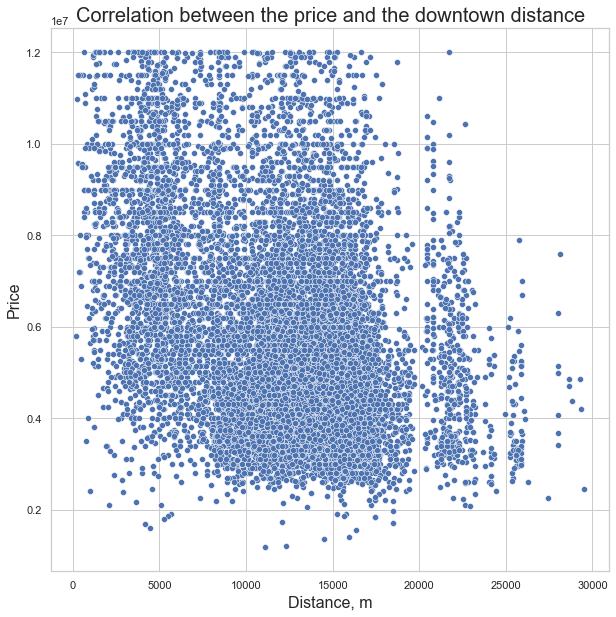

In [114]:
# price\downtown distance correlation
sns.scatterplot(data=filtered_data_spb, x='city_centers_nearest', y='last_price')
plt.title('Correlation between the price and the downtown distance', fontsize=20)
plt.xlabel('Distance, m', fontsize=16)
plt.ylabel('Price', fontsize=16);

As you can see, the chart is not irrelevant. To observe the correlation, let us analyze the change *in the average price* to the downtown distance (per kilometer). 

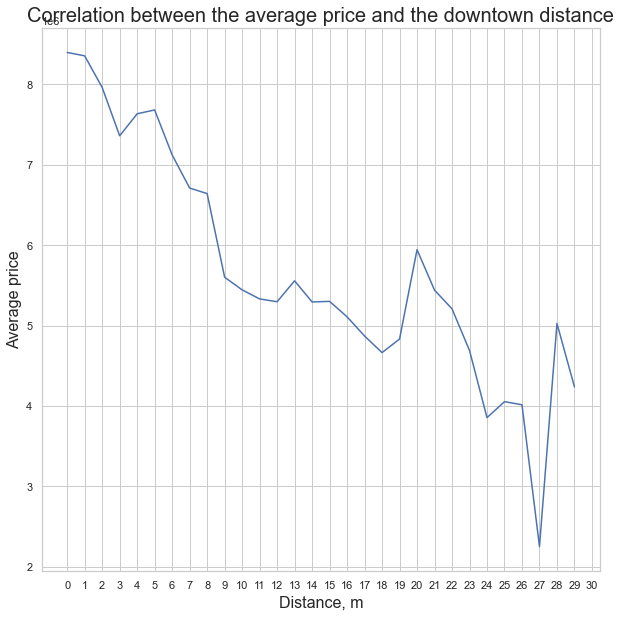

In [115]:
# average price\downtown distance correlation
(filtered_data_spb
 .pivot_table(index='city_centers_nearest_km', values='last_price')
 .plot(grid=True, xticks=np.arange(0, 31, 1), legend=False))
plt.title('Correlation between the average price and the downtown distance', fontsize=20)
plt.xlabel('Distance, m', fontsize=16)
plt.ylabel('Average price', fontsize=16);

According to the chart downtown zone apartments are located within a 8 kilometer radius (a dip in price is observed).  

### Factors that affect an apartment’s price in the downtown.

In [116]:
# downtown ads selecting
spb_center = filtered_data_spb.query('city_centers_nearest_km <= 8')

#### Area

In [117]:
# general information
spb_center[['total_area']].describe()

,total_area
count,"2,735.00"
mean,64.46
std,21.56
min,12.00
25%,47.00
50%,62.60
75%,79.00
max,120.00


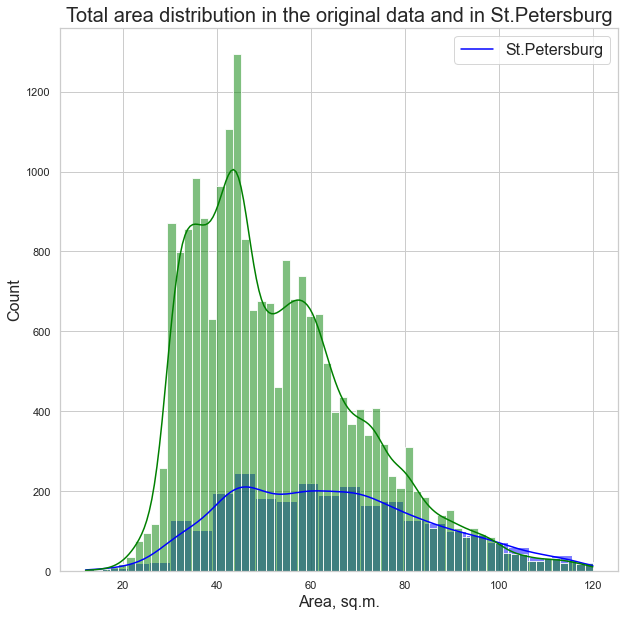

In [118]:
# total area histogram
sns.histplot(spb_center['total_area'], kde=True, color='blue')
sns.histplot(filtered_data['total_area'], kde=True, color='green')
plt.title('Total area distribution in the original data and in St.Petersburg', fontsize=20)
plt.xlabel('Area, sq.m.', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(['St.Petersburg'], fontsize=16);

#### Ceiling height

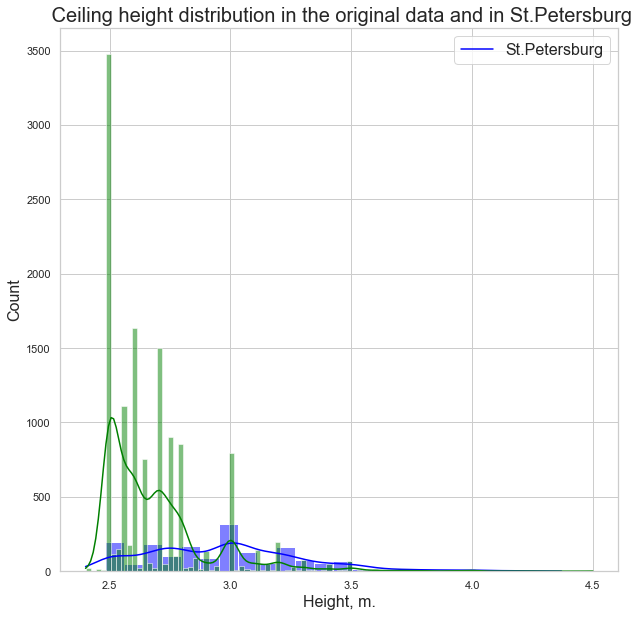

In [119]:
# график распределения высоты потолков
sns.histplot(spb_center['ceiling_height'], kde=True, color='blue')
sns.histplot(filtered_data['ceiling_height'], kde=True, color='green')
plt.title(' Ceiling height distribution in the original data and in St.Petersburg', fontsize=20)
plt.xlabel('Height, m.', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(['St.Petersburg'], fontsize=16);

#### Number of rooms

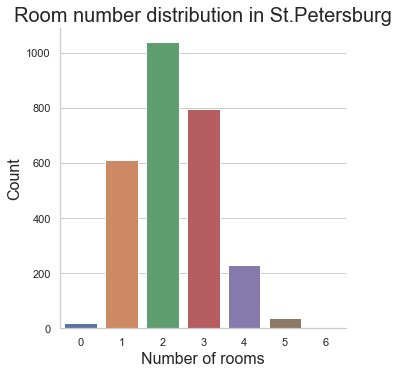

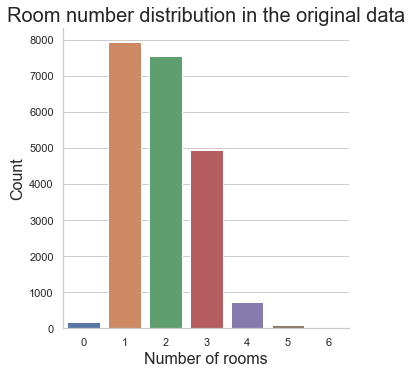

In [120]:
# график распределения числа комнат
sns.catplot(x='rooms', kind='count', data=spb_center)
plt.title('Room number distribution in St.Petersburg', fontsize=20)
plt.xlabel('Number of rooms', fontsize=16)
plt.ylabel('Count', fontsize=16)
sns.catplot(x='rooms', kind='count', data=filtered_data)
plt.title('Room number distribution in the original data', fontsize=20)
plt.xlabel('Number of rooms', fontsize=16)
plt.ylabel('Count', fontsize=16);

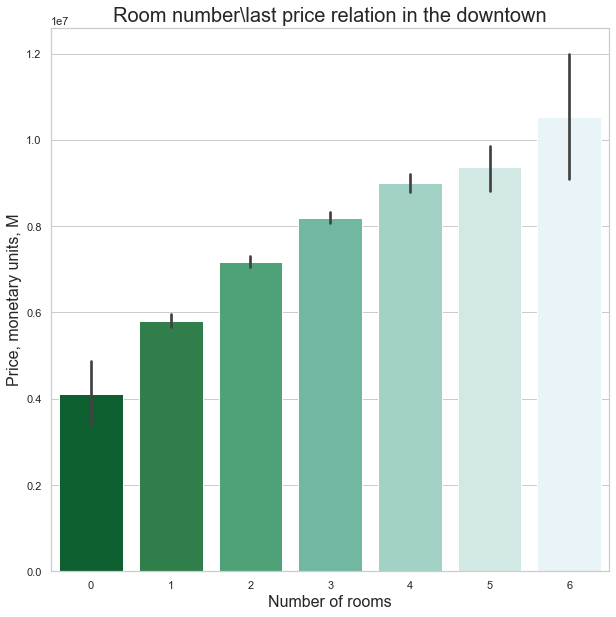

In [121]:
# влияние rooms на last_price
sns.set_theme(style='whitegrid')
sns.barplot(x='rooms', y='last_price', data=spb_center, palette='BuGn_r')
plt.title('Room number\last price relation in the downtown', fontsize=20)
plt.xlabel('Number of rooms', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16);

#### Last price

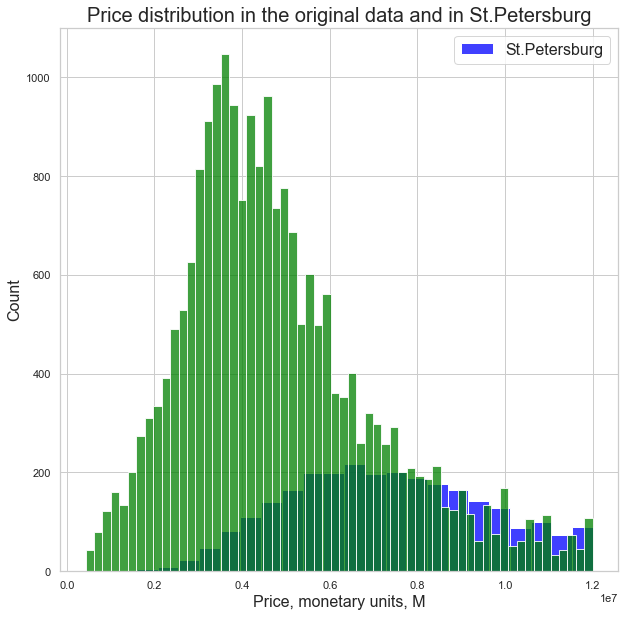

In [122]:
# price histogram
sns.histplot(spb_center['last_price'], color='blue')
sns.histplot(filtered_data['last_price'], color='green')
plt.title('Price distribution in the original data and in St.Petersburg', fontsize=20)
plt.xlabel('Price, monetary units, M', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(['St.Petersburg'], fontsize=16);

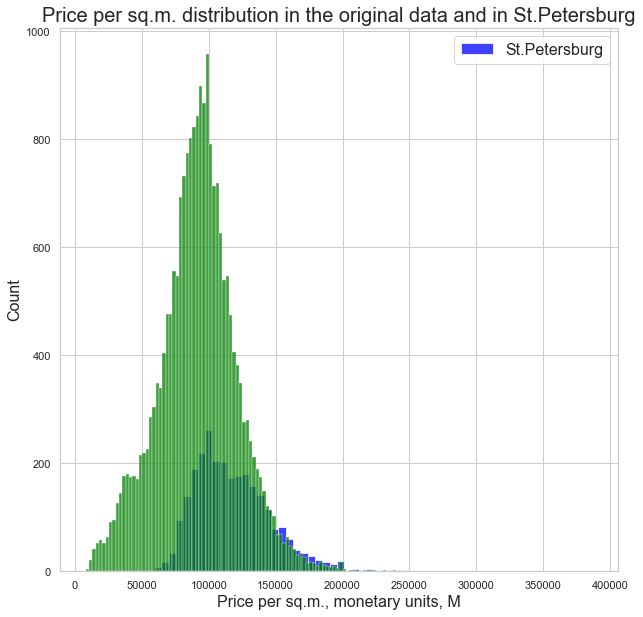

In [123]:
# price per sq.m. histogram
sns.histplot(spb_center['square_meter_price'], color='blue')
sns.histplot(filtered_data['square_meter_price'], color='green')
plt.title('Price per sq.m. distribution in the original data and in St.Petersburg', fontsize=20)
plt.xlabel('Price per sq.m., monetary units, M', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(['St.Petersburg'], fontsize=16);

### Factors affecting the cost of housing analysis.

#### Date of posting (year, month, weekday)

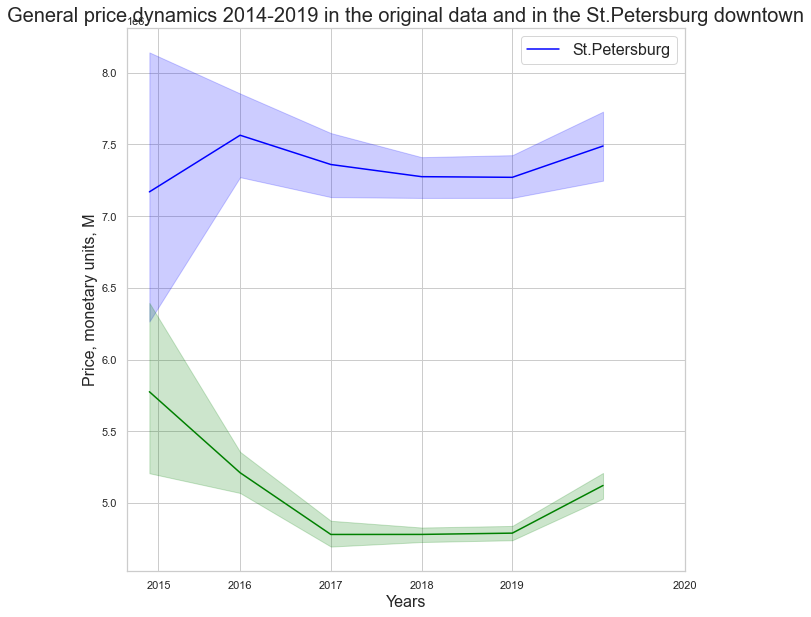

In [124]:
# general price dynamics 2014-2019 in the downtown
sns.lineplot(data=spb_center, x='year', y='last_price', color='blue')
sns.lineplot(data=filtered_data, x='year', y='last_price', color='green')
plt.title('General price dynamics 2014-2019 in the original data and in the St.Petersburg downtown', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16)
plt.legend(['St.Petersburg'], fontsize=16)
plt.xticks([2014.1,2015,2016,2017,2018,2019.9],[2015,2016,2017,2018,2019,2020]);

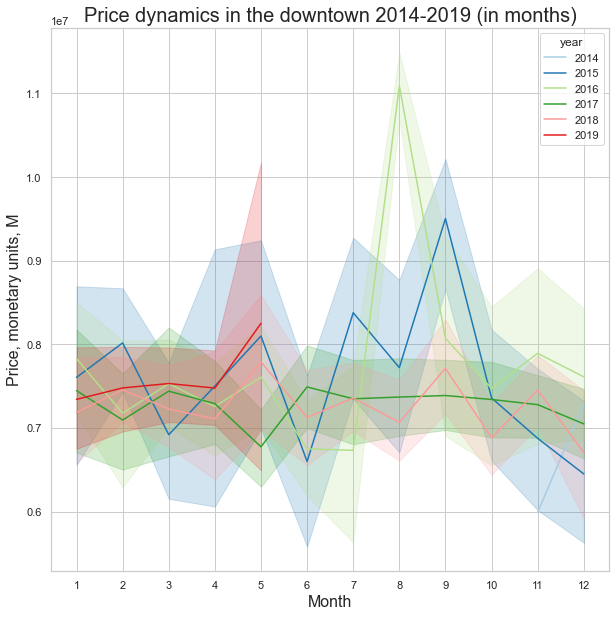

In [125]:
# price dynamics in the downtown 2014-2019 (in months)
sns.lineplot(data=spb_center, x='month', y='last_price', hue='year', palette='Paired', color='blue')
plt.title('Price dynamics in the downtown 2014-2019 (in months)', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price, monetary units, M', fontsize=16)
plt.xticks(np.arange(1,13,1),np.arange(1,13,1));

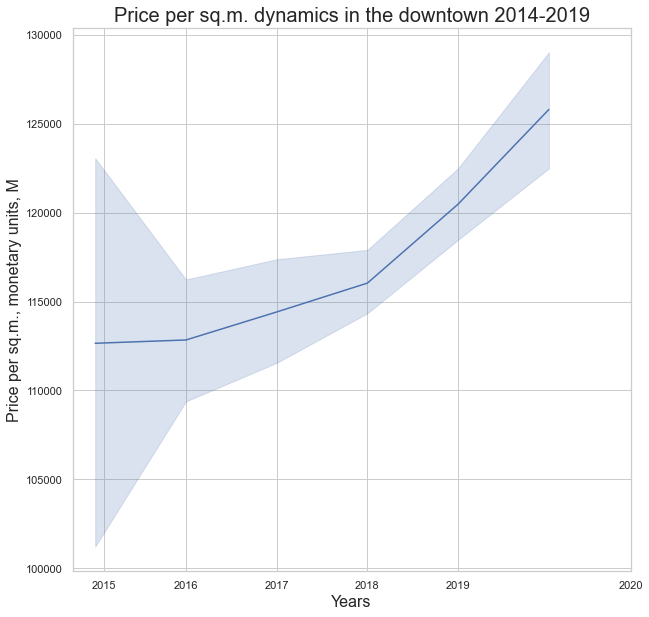

In [126]:
# price per sq.m. dynamics 2014-2019
sns.lineplot(data=spb_center, x='year', y='square_meter_price')
plt.title('Price per sq.m. dynamics in the downtown 2014-2019', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Price per sq.m., monetary units, M', fontsize=16)
plt.xticks([2014.1,2015,2016,2017,2018,2019.9],[2015,2016,2017,2018,2019,2020]);

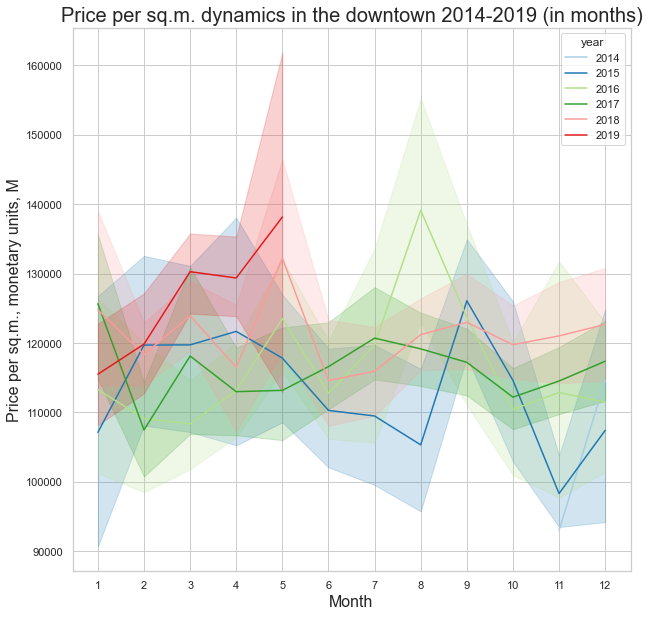

In [127]:
# price per sq.m. dynamics in the downtown 2014-2019 (in months)
sns.lineplot(data=spb_center, x='month', y='square_meter_price', hue='year', palette='Paired', color='blue')
plt.title('Price per sq.m. dynamics in the downtown 2014-2019 (in months)', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price per sq.m., monetary units, M', fontsize=16)
plt.xticks(np.arange(1,13,1),np.arange(1,13,1));

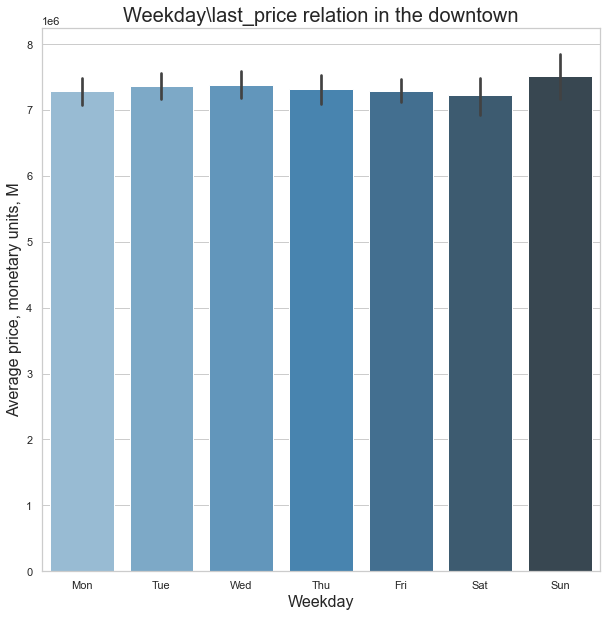

In [128]:
# weekday\last_price relation
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='weekday', y='last_price', data=spb_center, palette='Blues_d')
plt.title('Weekday\last_price relation in the downtown', fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

#### Floor group

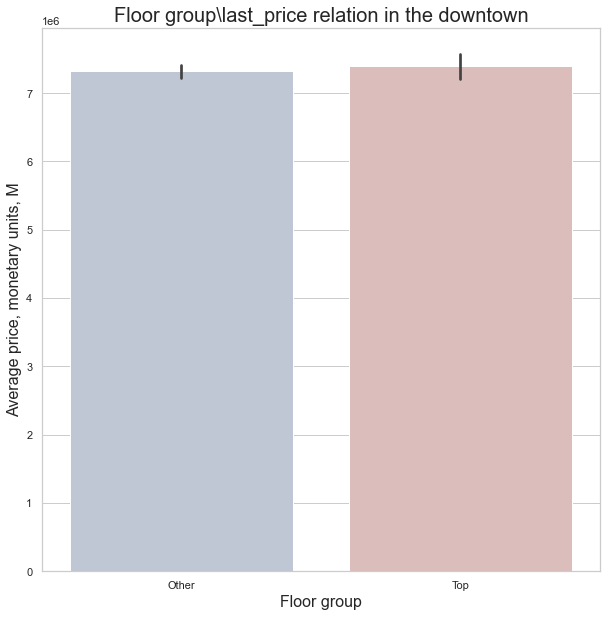

In [129]:
# floor_group\last_price relation
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='floor_group', y='last_price', data=spb_center, palette='vlag')
plt.title('Floor group\last_price relation in the downtown', fontsize=20)
plt.xticks([0, 1], ['Other', 'Top'])
plt.xlabel('Floor group', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

#### Number of rooms

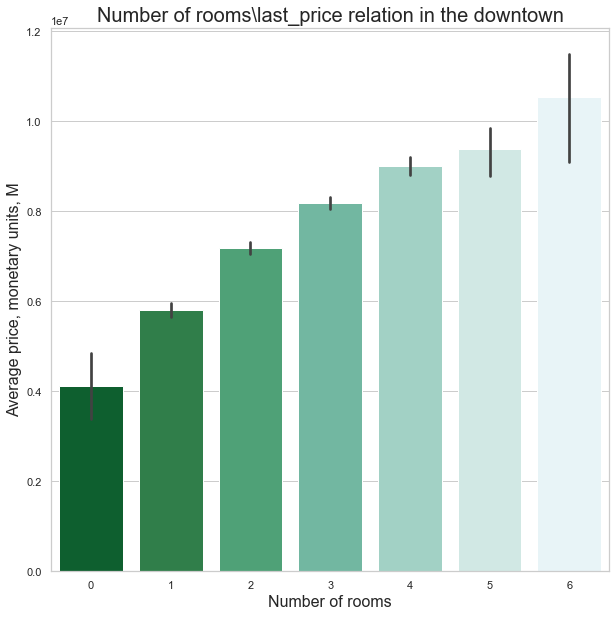

In [130]:
# rooms\last_price relation
sns.set_theme(style='whitegrid')
sns.barplot(x='rooms', y='last_price', data=spb_center, palette='BuGn_r')
plt.title('Number of rooms\last_price relation in the downtown', fontsize=20)
plt.xlabel('Number of rooms', fontsize=16)
plt.ylabel('Average price, monetary units, M', fontsize=16);

In [131]:
# new variable for correlation matrix
spb_data_for_matrix = spb_center[['total_area', 'last_price', 'city_centers_nearest', 'square_meter_price']]

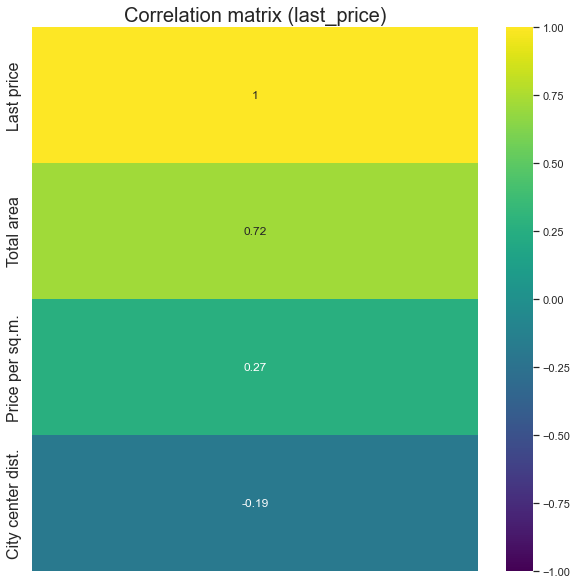

In [132]:
# last_price correlation matrix
heatmap = sns.heatmap(spb_data_for_matrix.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation matrix (last_price)', fontsize=20);
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Last price', 'Total area', 'Price per sq.m.', 'City center dist.'], fontsize=16)
plt.xticks([0], []);

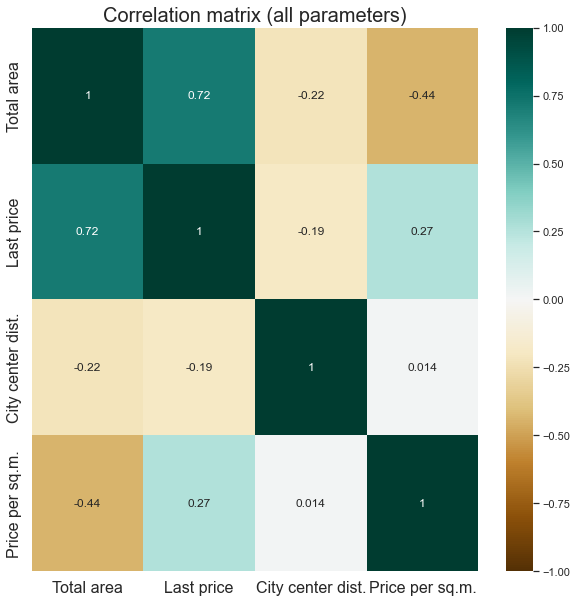

In [133]:
# total corr. matrix
heatmap = sns.heatmap(spb_data_for_matrix.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Total area', 'Last price', 'City center dist.', 'Price per sq.m.'], fontsize=16)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Total area', 'Last price', 'City center dist.', 'Price per sq.m.'], fontsize=16)
heatmap.set_title('Correlation matrix (all parameters)', fontsize=20);

## Conclusion <a id='id414'></a>

**Downtown metrics analysis (within a 8 km. radius):**    

*Area.* This segment uniformly presents a range of 40-80 sq.m. housing, while in the original data this range is somewhat smaller (from 30 to 50 sq.m.) - i.e. apartments in the downtown have a larger area.     

*Ceiling height.* Ceiling height is on average higher - peak 3.0m. (main dataset - 2.5m).          

*Number of rooms* The downtown is characterized by two- and three-bedroom apartments (two-bedroom apartments as well as for the original data, take the first place), there is also a segment of four-bedroom apartments.      

*Price.* We observe higher prices (as expected) - a plateau of 5-9M against 3-5M for the original data.      

*Price per sq.m.* Is higher than in the original data.  

**Downtown metrics correlation**   

*General price dynamics 2014-2019 and in months.* We obeserve all trends of the original data, except for the price growth during 2015 (in the original data declines during this period).     

*Price per sq.m.* Increase during 2014-2019, monthly changes show us a slight fluctuations.          

*Weekday* The sale price is higher on Sunday. In general, the difference is insignificant.   

*Floor group.* The first floor group is absent (probably in the downtown first floor is taken by business premises). In general, in Saint-Petersburg subset there are only two apartments with the first floor category (not in the central part). Apartments on the top floor are more expensive (but the difference is insignificant).         

*City center distance* There is a strong correlation between price and city center distance.    

*Number of rooms* We observe a positive correlation with price.     

Heatmaps show a strong correlation between the last price and the total area (0.72) and weak between the price and the price per sq.m.(0.27).

# General conclusion <a id='id5'></a>

<div style="border:solid green 2px; padding: 20px">
    
In this project we've analyzed the data from Yandex.Realty provided for us. A real estate agency have had an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years.         
The data contained following information about apartments: total and living area, ceiling height, the number of balconies, building and surrounding infrastructure describing - floor number, locality name, nearest airport, park distance. Also we've had a brief information about the ad - publication date and how many days the ad was displayed (from publication to removal).    
    
**The main points in data preprocessing:**

* data artifacts processing;
* column headings processing;
* data type changing;
* duplicates and missing values processing;
* data categorization;
* dataframe editing - calculated columns: price per sq.m., weekday, month and year of posting, liv.\total area ratio, kitchen\total area ratio;
* data filtering (under the following conditions):
    - total area up to 120 sq.m. incl.;
    - price up to 12M. incl.;
    - number of rooms up to 7 incl.;
    - ceiling height range 2.4 - 4.5 m. incl.;
    
**Comments** 
    
There were about 40% of NaN values in the `ceiling_height` column, we've not replaced (due to the large percentage of them). Therefore, we've analyzed only 60% values. In this column were found also two-digit numbers (incorrect values) due to the manual data entry ('human errors').     
    
80% and 50% of NaN records we've observed in the `is_apartment` and 'balcony' columns. Probably they were caused by the missing information from seller (if seller did not explicitly state 'No' - NaN value is recorded). 
    
The `days exposition` column has 13% of missing values, the reason could not be established. This data is counting automatically (from the moment of posting to withdrawal). It is possible that unclaimed ads remain in the database.   
    
From 20% to 60% of NaN values were observed in the infrastructure features - pond, park, airport. We've left them as they stand.  
  
Also, we've revealed a large amount of property transactions made in less than 30 days, especially less than 10 days. Fast-running sales were absent in 2014 and 2015. Their share increased sharply in the second half of 2017 (from 4% in 2016 to 20%), and in 2018-2019 they make up 25% of total sales. 
   
**The main points in the EDA:**
    
Data are reported from 2014 to 2019 (with a small number of ads in 2014 (136 compared to 1164 in 2015)). The bulk of ads falls to 2017-2018 (8153 and 8474 respectively). 
    
* average sell time - 3 months;
* typical area lies between 40 and 70 sq.m.
* one- and two-bedroom apartments occur most frequently;
* maximum average price was observed at the end of 2014 (6.4M), then it decreased to 4.4M by August 2016 and stabilized at 4.8M;
* from the 2018 mid-year to the first half of 2019 the price is going up to 5.2M (and the growth trend continues); 
* the largest number of ads have St.Petersburg and the surrounding areas (the same locations have the highest prices per sq.m., along with the villages in the north-west of Petersburg (Lisi Nos, Zelenogorsk, Sestroretsk, Repino - located along the coast of the Gulf of Finland));
* the settlements with the lowest price per sq.m. (Vyborg, Vsevolodzsk, Gatchina) are remote from St.Petersburg. Also, they have a small number (1-2) of ads.
    
**Correlations:**

* a weekday doesn't have a significant impact on the sale price; 
* the demand for first\top floor housing is expectedly lower (for the first floor apartments the average sale price is lower by 1.8 times);
* the price growth with an increase of the rooms number;
* there is a correlation between price and area (strong positive) and city center distance (weak negative);
    
**The main points in the St.Petersburg analysis:**
    
* the typical area increases (evenly represented 40-80 sq.m. range, while in the original data this range is somewhat smaller (from 30 to 50 sq.m.));
* increase in the total price, prices per sq.m., ceiling height (up to 3m.), the number of rooms (2-3 bedroom apartments);
* the price for top floor apartments is slightly higher, the other correlations stay the same;
* it's not represented the first floor segment;
* the downtown zone is located within a 8 kilometer radius;
* the downtown price dynamics retains all trends of the original data, except for the price growth during 2015 (in the original data declines during this period).

**Recomendations:**
    
* introduce a limit on the ceiling height input - cannot be a two-digit number - or offer the height categories (for example, 2.5-2.7m, 2.7-3m, etc., if the user does not know the exact ceiling height);
* auto complete (False) for the `is_apartment` and `balcony` columns when field stays blank;
* auto complete for infrastructure data distances based on the given address;
* auto deletion of outdated ads (or the user can be asked to update them);
* investigate fast-running sales (made in less than 30 days. especially less than 10 days) for fraud;